In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from plotly.offline import iplot
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
URL = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df = pd.read_csv(URL)
copy_df = df.copy()

In [3]:
# 생략없이 보기 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
0           Destineer     0.04        0        0           0  
1  Namco Bandai Games     0.17        0        0        0.01  
2           Alchemist        0        0     0.02           0  
3           Zoo Games     0.04        0        0           0  
4         D3Publisher     0.12     0.09        0        0.04

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [8]:
# 결측치 제거

In [9]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [10]:
df = df.dropna(axis=0)
df.shape

(16241, 9)

In [11]:
df = df.loc[(df.Year > 1900) & (df.Year < 2018)].reset_index(drop=True)
df.shape

(16140, 9)

In [12]:
# 단위통합

In [13]:
change_MK = df.iloc[:,-4:]

In [14]:
change_MK.NA_Sales = change_MK.NA_Sales.str.replace('M','')
change_MK.EU_Sales = change_MK.EU_Sales.str.replace('M','')
change_MK.JP_Sales = change_MK.JP_Sales.str.replace('M','')
change_MK.Other_Sales = change_MK.Other_Sales.str.replace('M','')

In [15]:
for i,val in enumerate(change_MK.NA_Sales):
    if 'K' in val:
        tmp = float(val.replace('K',''))
        change_MK.NA_Sales[i] = tmp/1000

In [16]:
for i,val in enumerate(change_MK.EU_Sales):
    if 'K' in val:
        tmp = float(val.replace('K',''))
        change_MK.EU_Sales[i] = tmp/1000

In [17]:
for i,val in enumerate(change_MK.JP_Sales):
    if 'K' in val:
        tmp = float(val.replace('K',''))
        change_MK.JP_Sales[i] = tmp/1000

In [18]:
for i,val in enumerate(change_MK.Other_Sales):
    if 'K' in val:
        tmp = float(val.replace('K',''))
        change_MK.Other_Sales[i] = tmp/1000

In [19]:
df.iloc[:,-4:] = change_MK.astype(float)

In [20]:
df.Year = df.Year.astype(int)
df.Year = df.Year.astype(object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16140 entries, 0 to 16139
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16140 non-null  object 
 1   Platform     16140 non-null  object 
 2   Year         16140 non-null  object 
 3   Genre        16140 non-null  object 
 4   Publisher    16140 non-null  object 
 5   NA_Sales     16140 non-null  float64
 6   EU_Sales     16140 non-null  float64
 7   JP_Sales     16140 non-null  float64
 8   Other_Sales  16140 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [22]:
# 중복제거

In [23]:
df.duplicated().sum()

0

In [24]:
# 컬럼추가(Total_Sales, Annual_Sales_Estimate)
# Total_Sales = NA_Sales + EU_Sales + JP_Sales + Other_Sales
# Annual_Sales_Estimate = Total_Sales/(Year.max()+1)-Year

In [25]:
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [26]:
df.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
0           Destineer      0.04      0.00      0.00         0.00         0.04  
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18  
2           Alchemist      0.00      0.00      0.02         0.00         0.02  
3           Zoo Games      0.04      0.00      0.00         0.00         0.04  
4         D3Publisher      0.12      0.09      0.00         0.04         0.25

In [27]:
df.Year.max()

2017

max 값은 2020이지만, 실제로 6년 전 자료라 매출자료는 2016까지라고 봐야한다.
출시 게임 수는 2017까지 계산할 수 있다.

In [28]:
df['Annual_Sales_Estimate'] = df.Total_Sales/(2018-df.Year)
df.Annual_Sales_Estimate = df.Annual_Sales_Estimate.astype(float)

In [29]:
df.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  \
0           Destineer      0.04      0.00      0.00         0.00         0.04   
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18   
2           Alchemist      0.00      0.00      0.02         0.00         0.02   
3           Zoo Games      0.04      0.00      0.00         0.00         0.04   
4         D3Publisher      0.12      0.09      0.00         0.04         0.25   

   Annual_Sales_Estimate  
0                0.00400  
1                0.02000  
2                0.00250  
3                0.00500  
4                0.03125

In [30]:
# 분석

In [31]:
# 연도별

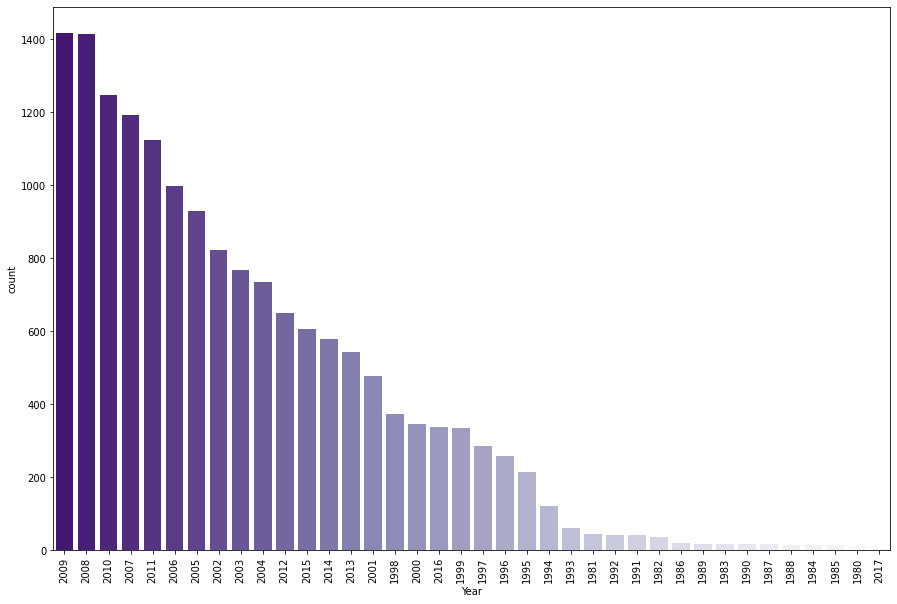

In [32]:
# 연도별 출시한 게임 수
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=df, order = df['Year'].value_counts().index, palette='Purples_r')
plt.xticks(rotation=90);

1995년부터 매출이 출시 게임이 많아짐
가장 많은 게임이 출시된 연도는 2008,2009년이고
2010년대부터 출시 수가 줄어들고 2016년에는 거의 1/3이상 줄어들었음
이는 기업이 2000년대 출시한 게임이 오래 살아남았거나
새로운 게임이 아닌 한 게임을 업데이트하는 방식일 수 있고
또는 
시장 진입이 어려워 졌다는 의미일 수 있음


In [33]:
sorted_year = df.groupby(['Year'])['Total_Sales'].sum()
sorted_year = pd.DataFrame(sorted_year)
sorted_year.columns = ['Total_Sales']
sorted_year = sorted_year.sort_values(by=['Total_Sales'], axis=0, ascending=False).reset_index()

In [34]:
sorted_year.Year = sorted_year.Year.astype(object)

In [35]:
sorted_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         38 non-null     object 
 1   Total_Sales  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


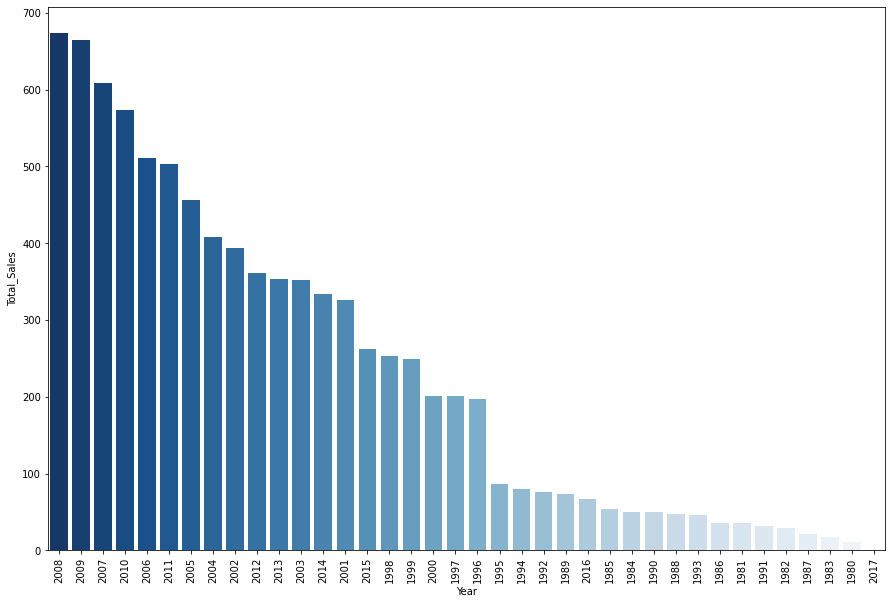

In [36]:
# 출시연도별 총매출
plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_year, x=sorted_year.Year, y='Total_Sales', order = sorted_year.Year, palette='Blues_r')
plt.xticks(rotation=90);

In [37]:
sorted_year.head()

Year  Total_Sales
0  2008       674.24
1  2009       664.70
2  2007       608.15
3  2010       573.24
4  2006       510.57

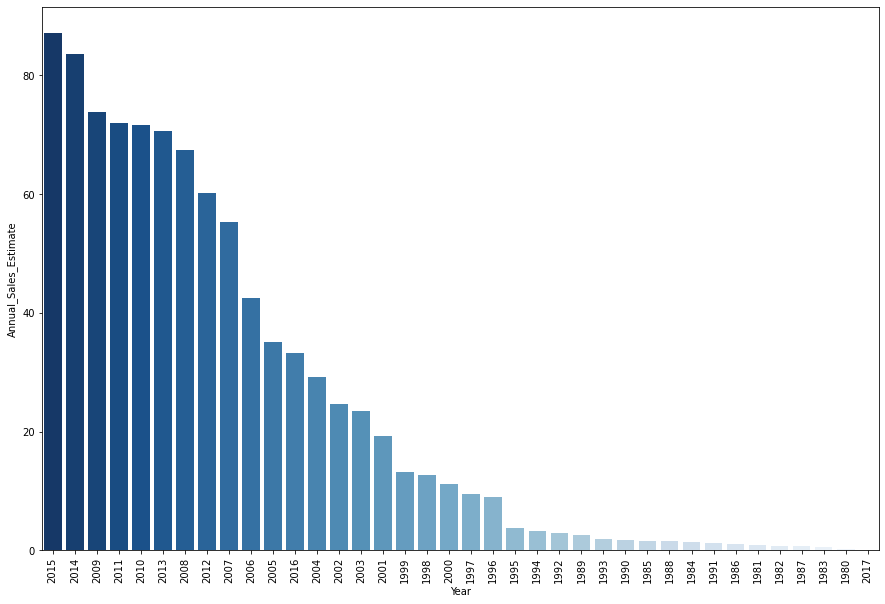

In [38]:
# 출시연도별 연매출추정
sorted_year2 = df.groupby(['Year'])['Annual_Sales_Estimate'].sum()
sorted_year2 = pd.DataFrame(sorted_year2)
sorted_year2.columns = ['Annual_Sales_Estimate']
sorted_year2 = sorted_year2.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False).reset_index()
sorted_year2.Year = sorted_year2.Year.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_year2, x=sorted_year2.Year, y='Annual_Sales_Estimate', order = sorted_year2.Year, palette='Blues_r')
plt.xticks(rotation=90);

In [39]:
sorted_year2.head()

Year  Annual_Sales_Estimate
0  2015              87.193333
1  2014              83.580000
2  2009              73.855556
3  2011              71.904286
4  2010              71.655000

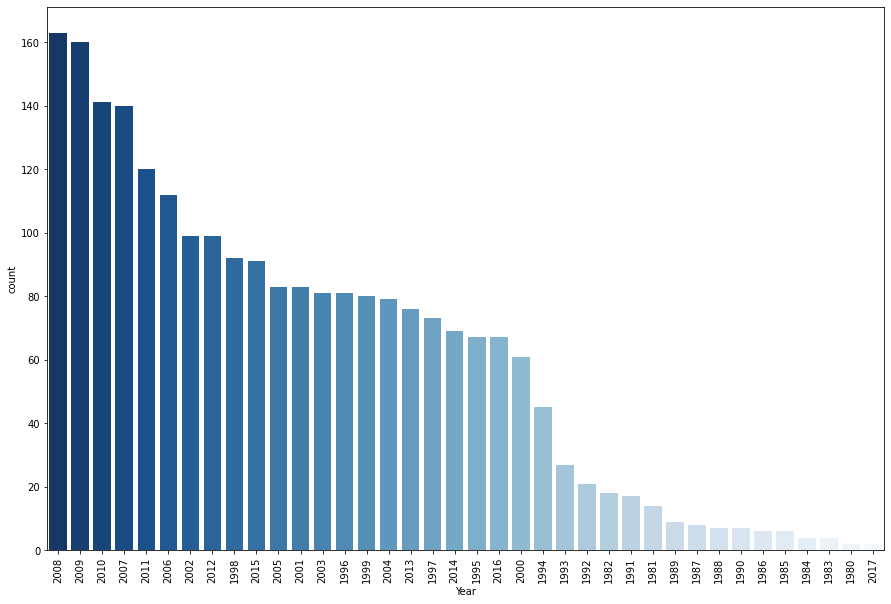

In [40]:
# 연도별 게임을 출시한 기업수
sorted_year3 = pd.DataFrame(df.groupby(['Year','Publisher'])['Publisher'].count())
sorted_year3.columns = ['count']
sorted_year3['count'] = 1
sorted_year3 = sorted_year3.reset_index()
sorted_year3 = pd.DataFrame(sorted_year3.groupby(['Year'])['count'].count())
sorted_year3.columns = ['count']
sorted_year3 = sorted_year3.sort_values(by=['count'], axis=0, ascending=False).reset_index()
sorted_year3.Year = sorted_year3.Year.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_year3, x='Year', y='count', order = sorted_year3.Year, palette='Blues_r')
plt.xticks(rotation=90);

In [41]:
sorted_year3.head()

Year  count
0  2008    163
1  2009    160
2  2010    141
3  2007    140
4  2011    120

In [42]:
# 장르별

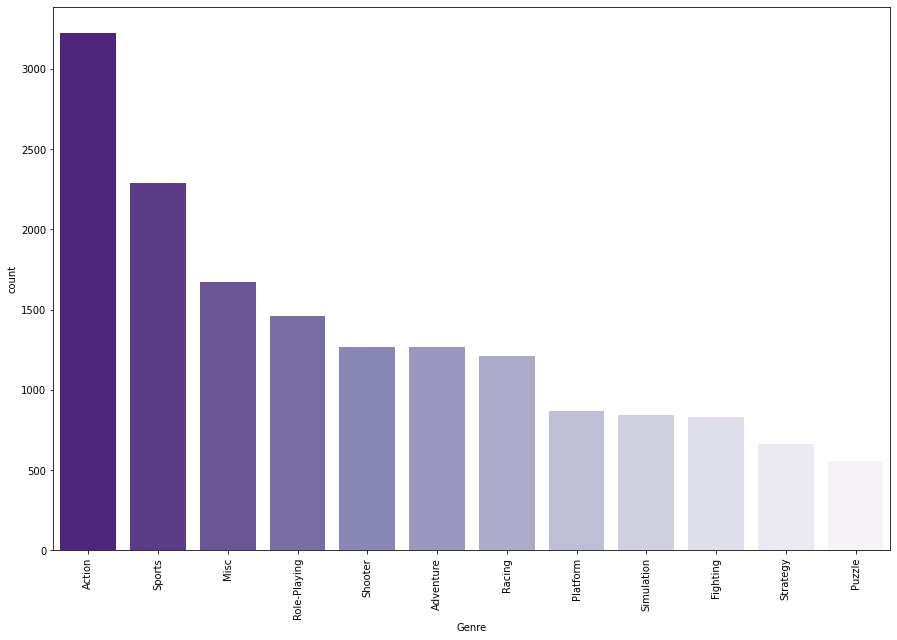

In [43]:
# 장르별 출시한 게임 수
plt.figure(figsize=(15, 10))
sns.countplot(x='Genre', data=df, order = df['Genre'].value_counts().index, palette='Purples_r')
plt.xticks(rotation=90);

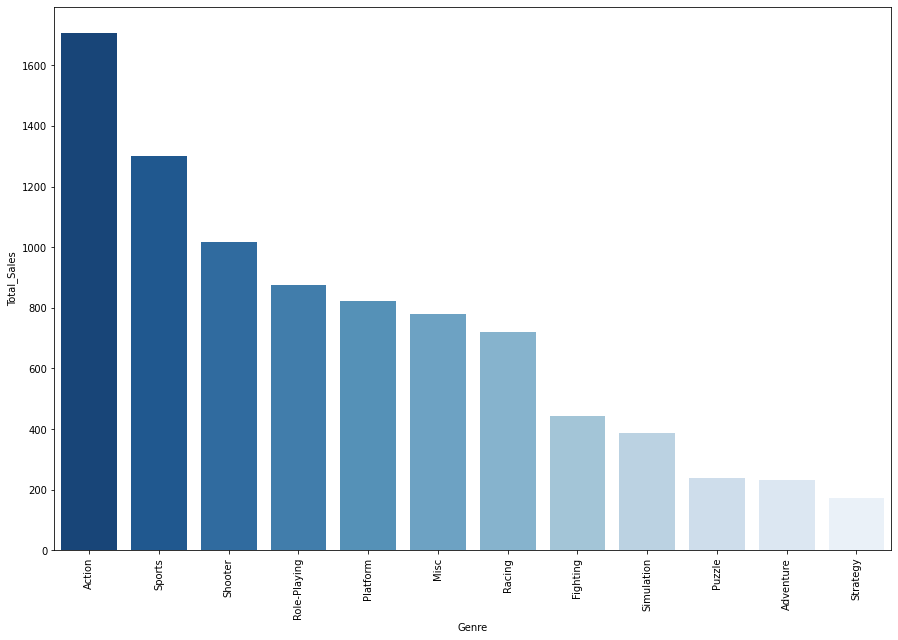

In [44]:
# 장르별 총매출
sorted_genre = df.groupby(['Genre'])['Total_Sales'].sum()
sorted_genre = pd.DataFrame(sorted_genre)
sorted_genre.columns = ['Total_Sales']
sorted_genre = sorted_genre.sort_values(by=['Total_Sales'], axis=0, ascending=False).reset_index()
sorted_genre.Genre = sorted_genre.Genre.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_genre, x=sorted_genre.Genre, y='Total_Sales', order = sorted_genre.Genre, palette='Blues_r')
plt.xticks(rotation=90);

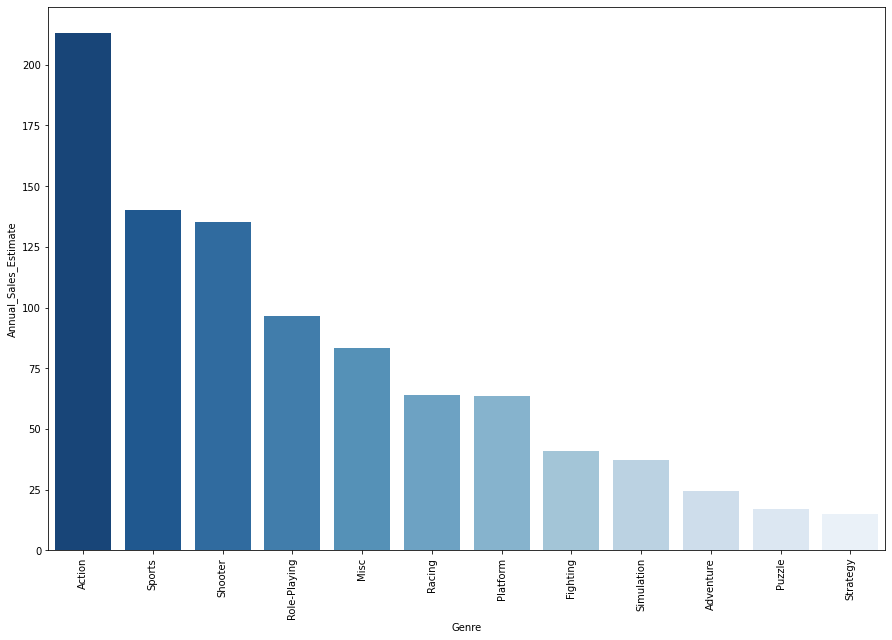

In [45]:
# 장르별 연매출추정
sorted_genre2 = df.groupby(['Genre'])['Annual_Sales_Estimate'].sum()
sorted_genre2 = pd.DataFrame(sorted_genre2)
sorted_genre2.columns = ['Annual_Sales_Estimate']
sorted_genre2 = sorted_genre2.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False).reset_index()
sorted_genre2.Genre = sorted_genre2.Genre.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_genre2, x=sorted_genre2.Genre, y='Annual_Sales_Estimate', order = sorted_genre2.Genre, palette='Blues_r')
plt.xticks(rotation=90);

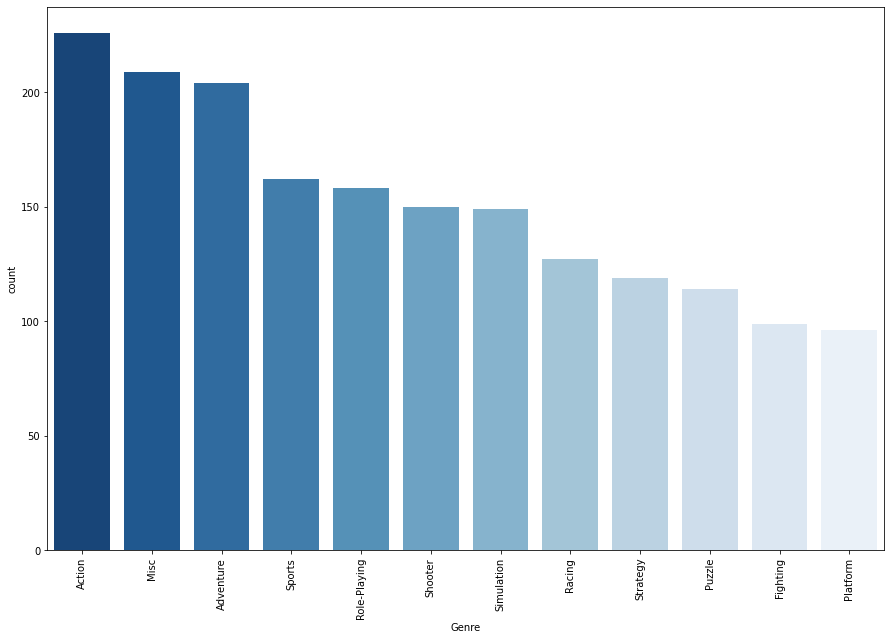

In [46]:
# 장르별 게임을 출시한 기업수
sorted_genre3 = pd.DataFrame(df.groupby(['Genre','Publisher'])['Publisher'].count())
sorted_genre3.columns = ['count']
sorted_genre3['count'] = 1
sorted_genre3 = sorted_genre3.reset_index()
sorted_genre3 = pd.DataFrame(sorted_genre3.groupby(['Genre'])['count'].count())
sorted_genre3.columns = ['count']
sorted_genre3 = sorted_genre3.sort_values(by=['count'], axis=0, ascending=False).reset_index()
sorted_genre3.Genre = sorted_genre3.Genre.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_genre3, x='Genre', y='count', order = sorted_genre3.Genre, palette='Blues_r')
plt.xticks(rotation=90);

In [47]:
# 연도별 장르비율
xaction=df[df.Genre=="Action"]
xsports=df[df.Genre=="Sports"]
xmisc=df[df.Genre=="Misc"]
xrole=df[df.Genre=="Role-Playing"]
xshooter=df[df.Genre=="Shooter"]
xadventure=df[df.Genre=="Adventure"]
xrace=df[df.Genre=="Racing"]
xyear=df[df.Genre=="Year"]
xsimulation=df[df.Genre=="Simulation"]
xfight=df[df.Genre=="Fighting"]
xstrategy=df[df.Genre=="Strategy"]
xpuzzle=df[df.Genre=="Puzzle"]

trace1 = go.Histogram(
    x=xaction.Year,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Year,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Year,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Year,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Year,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Year,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Year,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xyear.Year,
    opacity=0.75,
    name = "Year",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Year,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Year,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Year,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Year,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Year',
                   xaxis=dict(title='Year'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [48]:
# 플랫폼

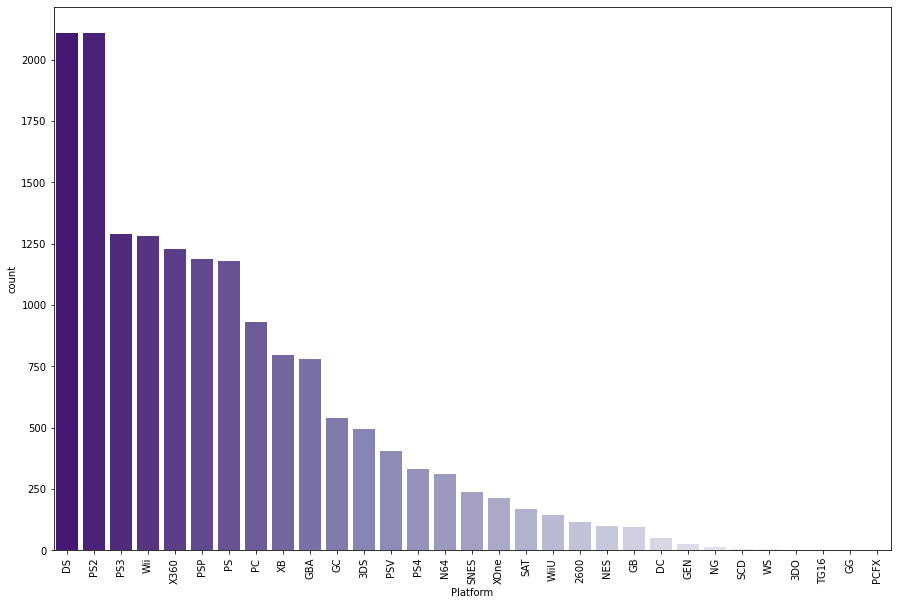

In [49]:
# 플랫폼별 출시한 게임 수
plt.figure(figsize=(15, 10))
sns.countplot(x='Platform', data=df, order = df['Platform'].value_counts().index, palette='Purples_r')
plt.xticks(rotation=90);

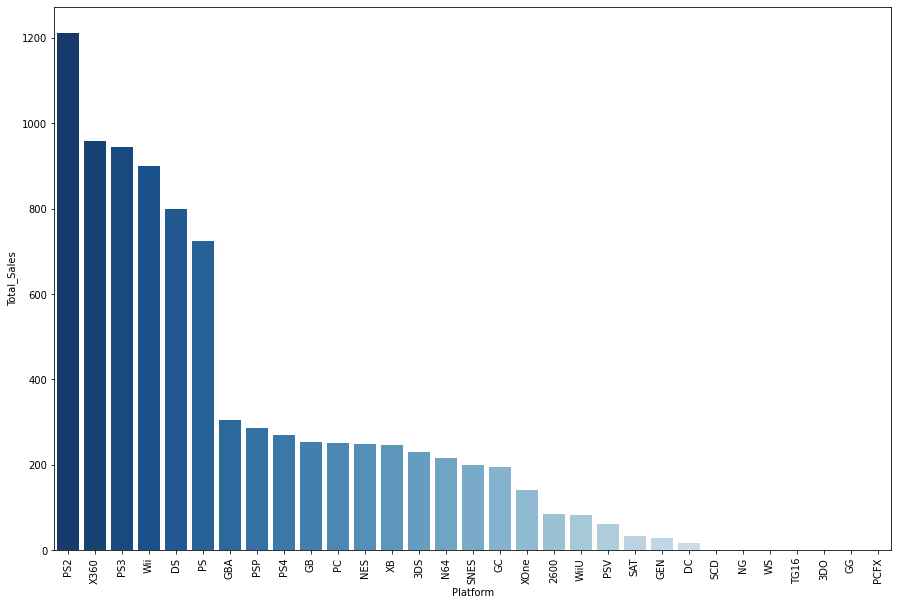

In [50]:
# 플랫폼별 총매출
sorted_platform = df.groupby(['Platform'])['Total_Sales'].sum()
sorted_platform = pd.DataFrame(sorted_platform)
sorted_platform.columns = ['Total_Sales']
sorted_platform = sorted_platform.sort_values(by=['Total_Sales'], axis=0, ascending=False).reset_index()
sorted_platform.Platform = sorted_platform.Platform.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_platform, x=sorted_platform.Platform, y='Total_Sales', order = sorted_platform.Platform, palette='Blues_r')
plt.xticks(rotation=90);

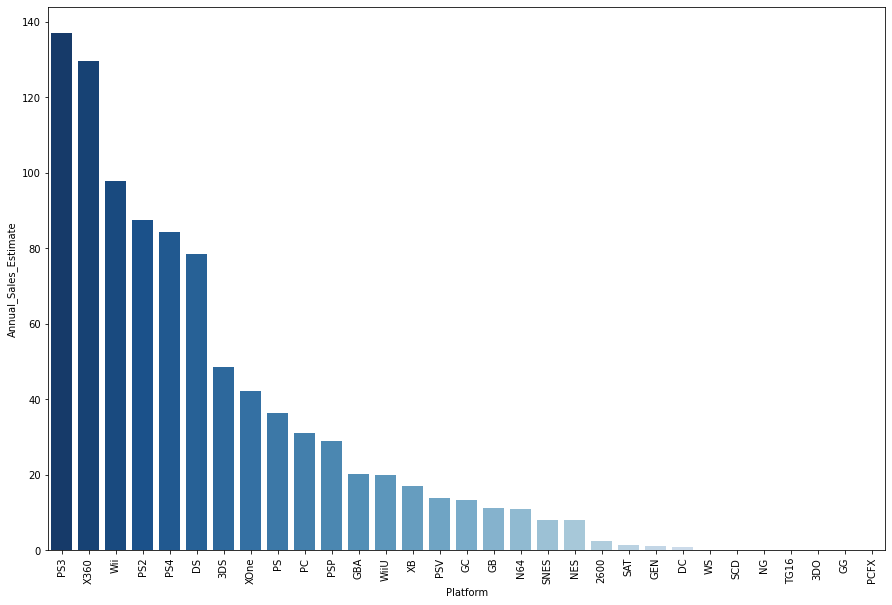

In [51]:
# 플랫폼별 연매출추정
sorted_platform2 = df.groupby(['Platform'])['Annual_Sales_Estimate'].sum()
sorted_platform2 = pd.DataFrame(sorted_platform2)
sorted_platform2.columns = ['Annual_Sales_Estimate']
sorted_platform2 = sorted_platform2.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False).reset_index()
sorted_platform2.Platform = sorted_platform2.Platform.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_platform2, x=sorted_platform2.Platform, y='Annual_Sales_Estimate', order = sorted_platform2.Platform, palette='Blues_r')
plt.xticks(rotation=90);

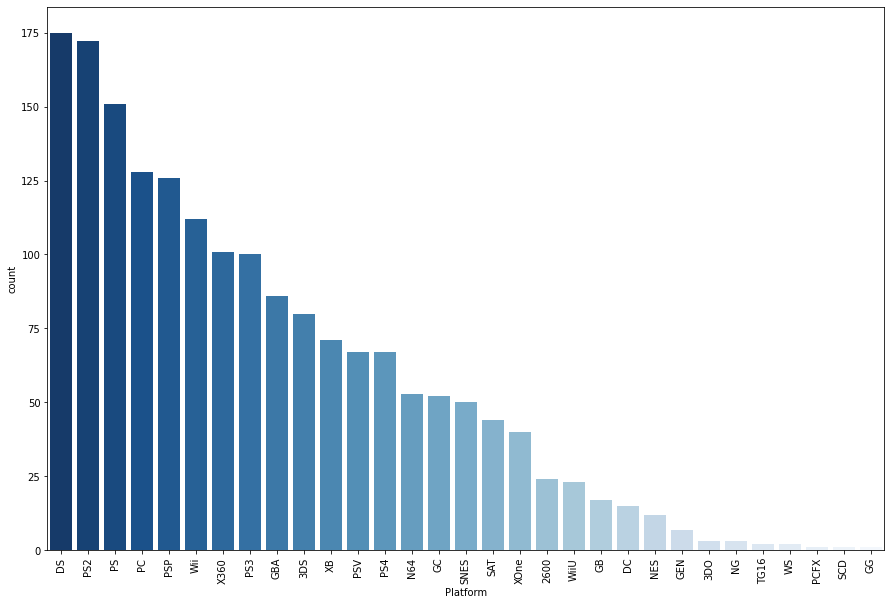

In [52]:
# 플랫폼별 게임을 출시한 기업수
sorted_platform3 = pd.DataFrame(df.groupby(['Platform','Publisher'])['Publisher'].count())
sorted_platform3.columns = ['count']
sorted_platform3['count'] = 1
sorted_platform3 = sorted_platform3.reset_index()
sorted_platform3 = pd.DataFrame(sorted_platform3.groupby(['Platform'])['count'].count())
sorted_platform3.columns = ['count']
sorted_platform3 = sorted_platform3.sort_values(by=['count'], axis=0, ascending=False).reset_index()
sorted_platform3.Platform = sorted_platform3.Platform.astype(object)

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_platform3, x='Platform', y='count', order = sorted_platform3.Platform, palette='Blues_r')
plt.xticks(rotation=90);

In [53]:
# 플랫폼별 장르비율
xaction=df[df.Genre=="Action"]
xsports=df[df.Genre=="Sports"]
xmisc=df[df.Genre=="Misc"]
xrole=df[df.Genre=="Role-Playing"]
xshooter=df[df.Genre=="Shooter"]
xadventure=df[df.Genre=="Adventure"]
xrace=df[df.Genre=="Racing"]
xplatform=df[df.Genre=="Platform"]
xsimulation=df[df.Genre=="Simulation"]
xfight=df[df.Genre=="Fighting"]
xstrategy=df[df.Genre=="Strategy"]
xpuzzle=df[df.Genre=="Puzzle"]

trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [54]:
# 기업별

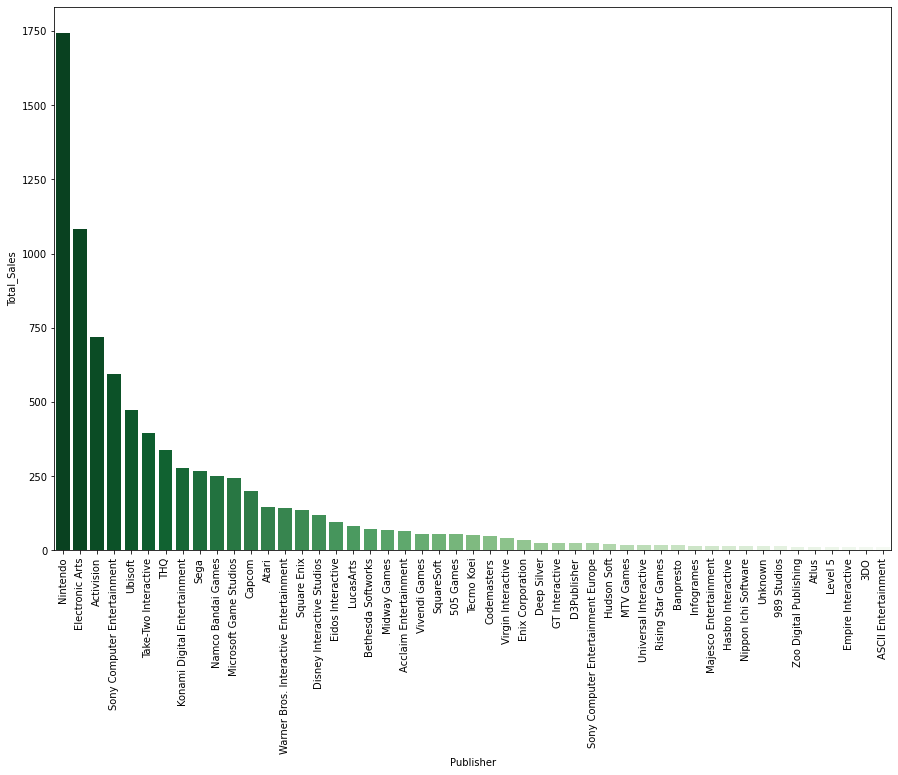

In [55]:
# 기업별 총매출
sorted_publisher = df.groupby(['Publisher'])['Total_Sales'].sum()
sorted_publisher = pd.DataFrame(sorted_publisher)
sorted_publisher.columns = ['Total_Sales']
sorted_publisher = sorted_publisher.loc[sorted_publisher.Total_Sales >= 10] # 10M이 넘는 기업만
sorted_publisher = sorted_publisher.sort_values(by=['Total_Sales'], axis=0, ascending=False).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_publisher, x=sorted_publisher.Publisher, y='Total_Sales', order = sorted_publisher.Publisher, palette='Greens_r')
plt.xticks(rotation=90);

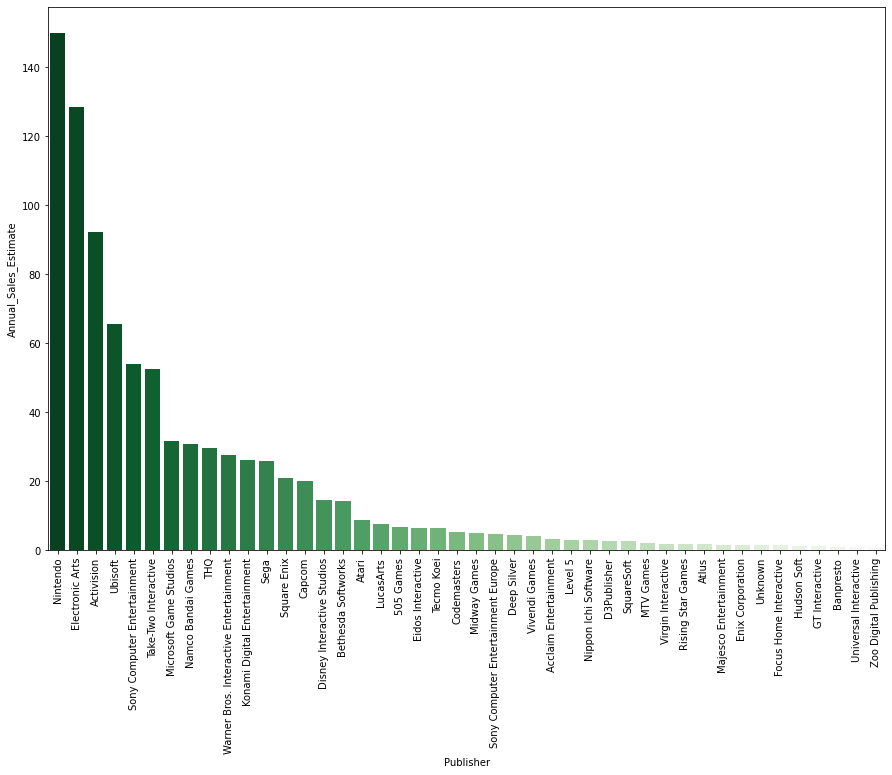

In [56]:
# 기업별 연매출추정
sorted_publisher = df.groupby(['Publisher'])['Annual_Sales_Estimate'].sum()
sorted_publisher = pd.DataFrame(sorted_publisher)
sorted_publisher.columns = ['Annual_Sales_Estimate']
sorted_publisher = sorted_publisher.loc[sorted_publisher.Annual_Sales_Estimate >= 1] # 1M이 넘는 기업만
sorted_publisher = sorted_publisher.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_publisher, x=sorted_publisher.Publisher, y='Annual_Sales_Estimate', order = sorted_publisher.Publisher, palette='Greens_r')
plt.xticks(rotation=90);

In [57]:
# Total_Sales 기준 Top 100

In [58]:
sorted_TS = df.sort_values(by=['Total_Sales'], axis=0, ascending=False).reset_index(drop=True)

In [59]:
Top_100_TS = sorted_TS.head(100)
Top_100_TS.index = Top_100_TS.index+1

In [60]:
trace1 = go.Scatter(
                    x = Top_100_TS.index,
                    y = Top_100_TS.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'greenyellow', size=7),
                    text= Top_100_TS.Name)

trace2 = go.Scatter(
                    x = Top_100_TS.index,
                    y = Top_100_TS.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'aqua',size=7),
                    text= Top_100_TS.Name)
trace3 = go.Scatter(
                    x = Top_100_TS.index,
                    y = Top_100_TS.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'coral',size=7),
                    text= Top_100_TS.Name)
trace4 = go.Scatter(
                    x = Top_100_TS.index,
                    y = Top_100_TS.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'royalblue',size=7),
                    text= Top_100_TS.Name)
                    

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen=5,zeroline=False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              paper_bgcolor='ivory',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

In [61]:
# Anuual_Sales_Estimate 기준 Top 100

In [62]:
sorted_ASE = df.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False).reset_index(drop=True)
Top_100_ASE = sorted_ASE.head(100)
Top_100_ASE.index = Top_100_ASE.index+1

In [63]:
trace1 = go.Scatter(
                    x = Top_100_ASE.index,
                    y = Top_100_ASE.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'greenyellow', size=7),
                    text= Top_100_ASE.Name)

trace2 = go.Scatter(
                    x = Top_100_ASE.index,
                    y = Top_100_ASE.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'aqua',size=7),
                    text= Top_100_ASE.Name)
trace3 = go.Scatter(
                    x = Top_100_ASE.index,
                    y = Top_100_ASE.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'coral',size=7),
                    text= Top_100_ASE.Name)
trace4 = go.Scatter(
                    x = Top_100_ASE.index,
                    y = Top_100_ASE.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'royalblue',size=7),
                    text= Top_100_ASE.Name)
                    

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen=5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              paper_bgcolor='ivory',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

In [64]:
fig={
    "data" : [
    {
        'x': Top_100_TS.index,
        'y': Top_100_TS.Year,
        'mode': 'markers',
        'marker': {
            "color":Top_100_TS.Total_Sales,
            'size': Top_100_TS.Total_Sales,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ Top_100_TS.Name +","+" Publisher:" + Top_100_TS.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Total Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

In [65]:
Top_100_TS.head(20)

Name Platform  Year         Genre  \
1                                     Wii Sports      Wii  2006        Sports   
2                              Super Mario Bros.      NES  1985      Platform   
3                                 Mario Kart Wii      Wii  2008        Racing   
4                              Wii Sports Resort      Wii  2009        Sports   
5                       Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
6                                         Tetris       GB  1989        Puzzle   
7                          New Super Mario Bros.       DS  2006      Platform   
8                                       Wii Play      Wii  2006          Misc   
9                      New Super Mario Bros. Wii      Wii  2009      Platform   
10                                     Duck Hunt      NES  1984       Shooter   
11                                    Nintendogs       DS  2005    Simulation   
12                                 Mario Kart DS       DS  2005        Racing   
13                   Pokemon Gold/Pokemon Silver       GB  1999  Role-Playing   
14                                       Wii Fit      Wii  2007        Sports   
15                                  Wii Fit Plus      Wii  2009        Sports   
16                            Kinect Adventures!     X360  2010          Misc   
17                            Grand Theft Auto V      PS3  2013        Action   
18                 Grand Theft Auto: San Andreas      PS2  2004        Action   
19                             Super Mario World     SNES  1990      Platform   
20  Brain Age: Train Your Brain in Minutes a Day       DS  2005          Misc   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1                 Nintendo     41.49     29.02      3.77         8.46   
2                 Nintendo     29.08      3.58      6.81         0.77   
3                 Nintendo     15.85     12.88      3.79         3.31   
4                 Nintendo     15.75     11.01      3.28         2.96   
5                 Nintendo     11.27      8.89     10.22         1.00   
6                 Nintendo     23.20      2.26      4.22         0.58   
7                 Nintendo     11.38      9.23      6.50         2.90   
8                 Nintendo     14.03      9.20      2.93         2.85   
9                 Nintendo     14.59      7.06      4.70         2.26   
10                Nintendo     26.93      0.63      0.28         0.47   
11                Nintendo      9.07     11.00      1.93         2.75   
12                Nintendo      9.81      7.57      4.13         1.92   
13                Nintendo      9.00      6.18      7.20         0.71   
14                Nintendo      8.94      8.03      3.60         2.15   
15                Nintendo      9.09      8.59      2.53         1.79   
16  Microsoft Game Studios     14.97      4.94      0.24         1.67   
17    Take-Two Interactive      7.01      9.27      0.97         4.14   
18    Take-Two Interactive      9.43      0.40      0.41        10.57   
19                Nintendo     12.78      3.75      3.54         0.55   
20                Nintendo      4.75      9.26      4.16         2.05   

    Total_Sales  Annual_Sales_Estimate  
1         82.74               6.895000  
2         40.24               1.219394  
3         35.83               3.583000  
4         33.00               3.666667  
5         31.38               1.426364  
6         30.26               1.043448  
7         30.01               2.500833  
8         29.01               2.417500  
9         28.61               3.178889  
10        28.31               0.832647  
11        24.75               1.903846  
12        23.43               1.802308  
13        23.09               1.215263  
14        22.72               2.065455  
15        22.00               2.444444  
16        21.82               2.727500  
17        21.39               4.278000  
18        20.81               1.486429  
19        20.62              

In [66]:
fig={
    "data" : [
    {
        'x': Top_100_ASE.index,
        'y': Top_100_ASE.Year,
        'mode': 'markers',
        'marker': {
            "color":Top_100_ASE.Total_Sales,
            'size': Top_100_ASE.Total_Sales,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ Top_100_ASE.Name +","+" Publisher:" + Top_100_ASE.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Total Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

In [67]:
Top_100_ASE.head(10)

Name Platform  Year         Genre  \
1                                  Wii Sports      Wii  2006        Sports   
2                   Call of Duty: Black Ops 3      PS4  2015       Shooter   
3                          Grand Theft Auto V      PS3  2013        Action   
4                           Wii Sports Resort      Wii  2009        Sports   
5                              Mario Kart Wii      Wii  2008        Racing   
6                          Grand Theft Auto V     X360  2013        Action   
7                   New Super Mario Bros. Wii      Wii  2009      Platform   
8                          Grand Theft Auto V      PS4  2014        Action   
9   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014  Role-Playing   
10                                    FIFA 16      PS4  2015        Sports   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1               Nintendo     41.49     29.02      3.77         8.46   
2             Activision      5.77      5.81      0.35         2.31   
3   Take-Two Interactive      7.01      9.27      0.97         4.14   
4               Nintendo     15.75     11.01      3.28         2.96   
5               Nintendo     15.85     12.88      3.79         3.31   
6   Take-Two Interactive      9.63      5.31      0.06         1.38   
7               Nintendo     14.59      7.06      4.70         2.26   
8   Take-Two Interactive      3.80      5.81      0.36         2.02   
9               Nintendo      4.23      3.37      3.08         0.65   
10       Electronic Arts      1.11      6.06      0.06         1.26   

    Total_Sales  Annual_Sales_Estimate  
1         82.74               6.895000  
2         14.24               4.746667  
3         21.39               4.278000  
4         33.00               3.666667  
5         35.83               3.583000  
6         16.38               3.276000  
7         28.61               3.178889  
8         11.99               2.997500  
9         11.33               2.832500  
10         8.49               2.830000

+ Total_Sales Rank가 높은 것 중 출시년도가 오래된 게임들이 많다. > 연도별 판매율을 알 수 없기 때문에 현재까지 판매되는 스테디셀러로 봐야하는지 확인이 필요하다.

+ Annual_Sales_Estimate Rank가 높은 것은 비교적 2006년 이후 출시된 제품이다. > 앞으로도 연간 매출 추정을 따라가서 Total_Sales Rank도 높아질 것인지 아니면 짧은 기간동안 베스트셀러인지 확인이 필요하다.

+ Top 100의 많은 점유율을 가진 장르를 선택해야할지
(레드오션 vs 블루오션)

In [68]:
# Top 100 기업별, 장르별, 플랫폼별 점유율(Total_Sales 기준)

In [69]:
# Publisher 점유율
grouping_P = Top_100_TS.groupby(['Publisher'])['Total_Sales'].sum()
grouping_P = pd.DataFrame(grouping_P)
grouping_P.columns = ['Total_Sales']
grouping_P = grouping_P.sort_values(by=['Total_Sales'], axis=0, ascending=False)
grouping_P

Total_Sales
Publisher                               
Nintendo                          889.48
Activision                        173.22
Take-Two Interactive              129.15
Sony Computer Entertainment        83.16
Microsoft Game Studios             71.27
Electronic Arts                    47.09
Ubisoft                            27.06
Sega                                8.05
SquareSoft                          7.86
Atari                               7.81

In [70]:
# Genre 점유율
grouping_G = Top_100_TS.groupby(['Genre'])['Total_Sales'].sum()
grouping_G = pd.DataFrame(grouping_G)
grouping_G.columns = ['Total_Sales']
grouping_G = grouping_G.sort_values(by=['Total_Sales'], axis=0, ascending=False)

In [71]:
# Platform 점유율
grouping_F = Top_100_TS.groupby(['Platform'])['Total_Sales'].sum()
grouping_F = pd.DataFrame(grouping_F)
grouping_F.columns = ['Total_Sales']
grouping_F = grouping_F.sort_values(by=['Total_Sales'], axis=0, ascending=False)

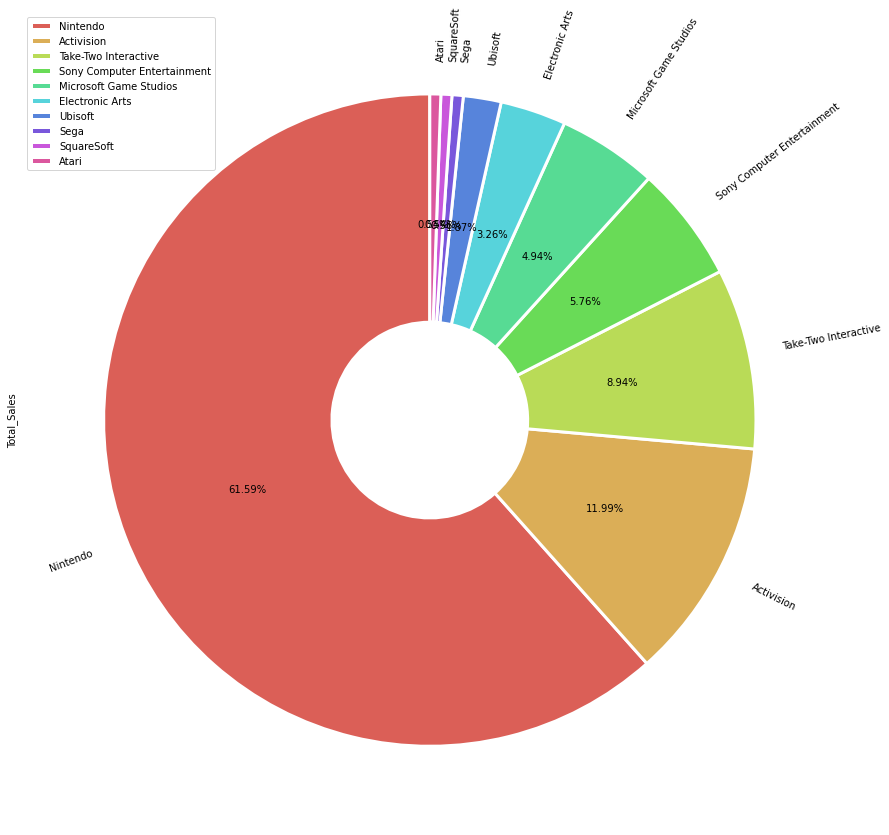

In [72]:
colors = sns.color_palette('hls',len(grouping_P))
grouping_P.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

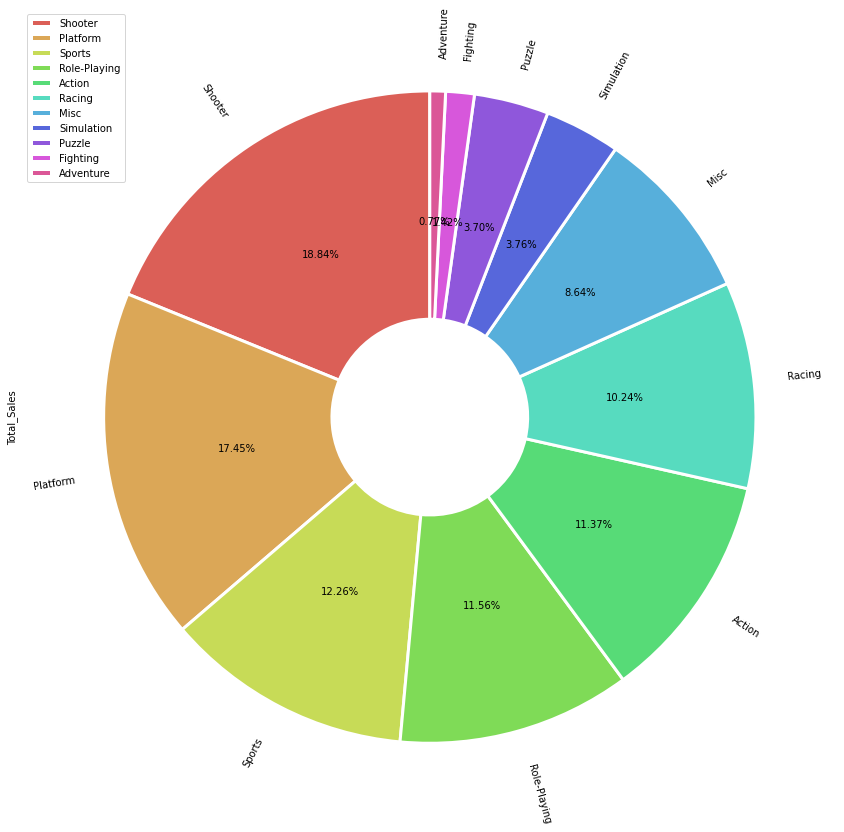

In [73]:
colors = sns.color_palette('hls',len(grouping_G))
grouping_G.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

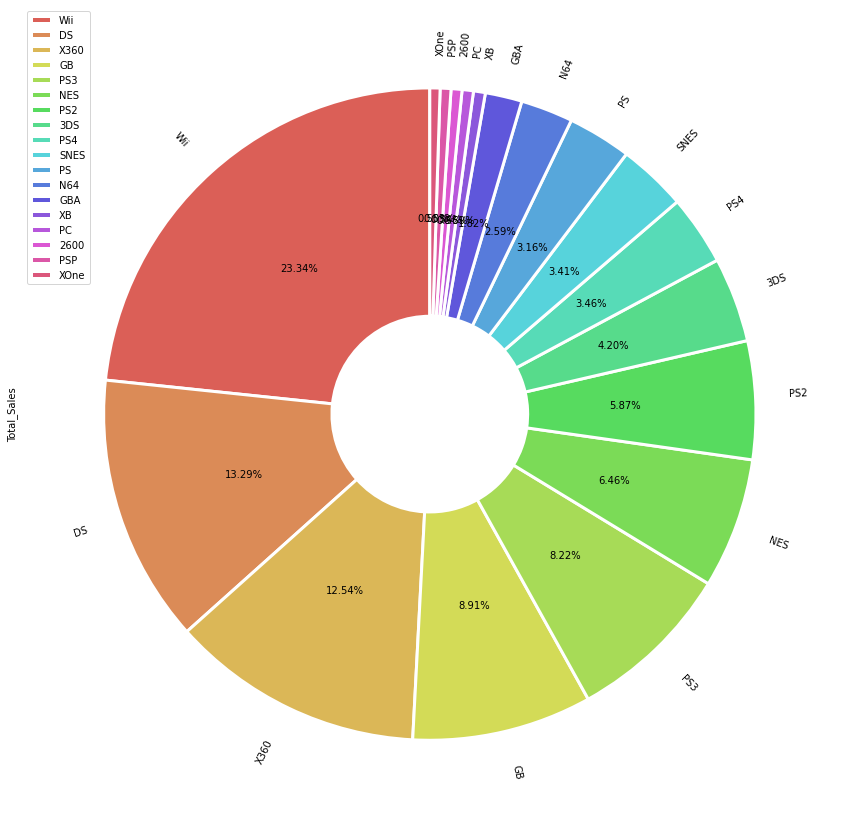

In [74]:
colors = sns.color_palette('hls',len(grouping_F))
grouping_F.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

In [75]:
# Top 100 기업별, 장르별, 플랫폼별 점유율(Annual_Sales_Estimate) 기준)

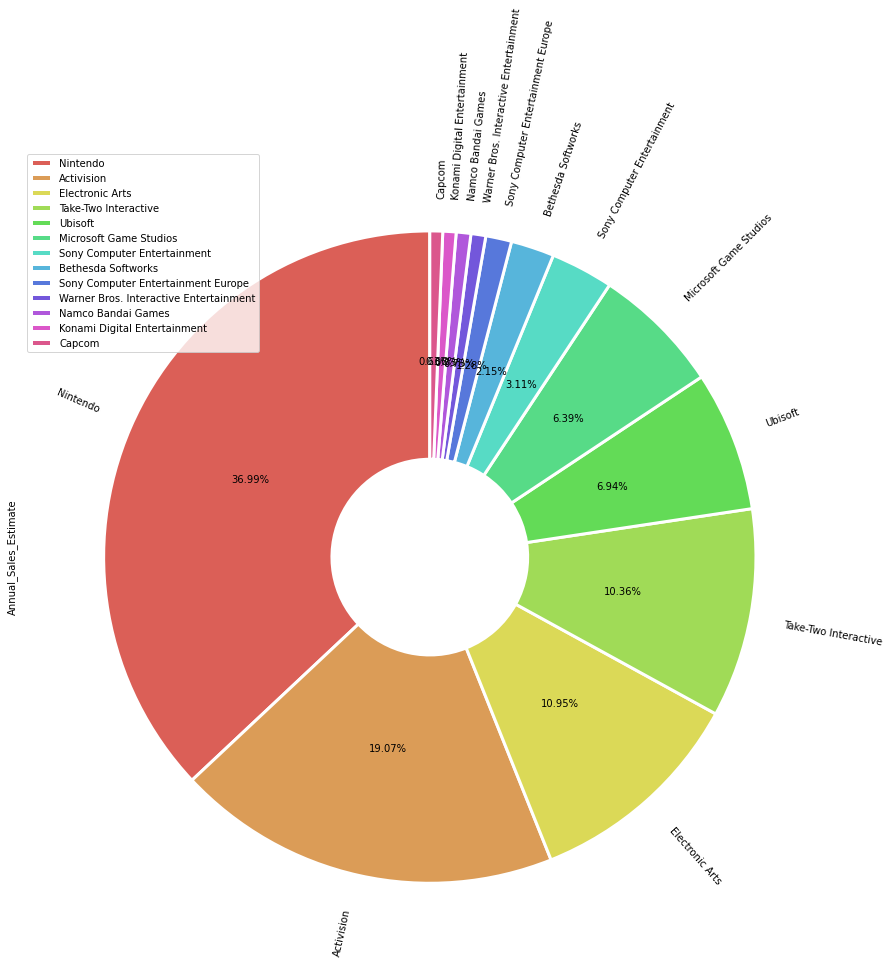

In [76]:
# Publisher 점유율
grouping_P2 = Top_100_ASE.groupby(['Publisher'])['Annual_Sales_Estimate'].sum()
grouping_P2 = pd.DataFrame(grouping_P2)
grouping_P2.columns = ['Annual_Sales_Estimate']
grouping_P2 = grouping_P2.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('hls',len(grouping_P2))
grouping_P2.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

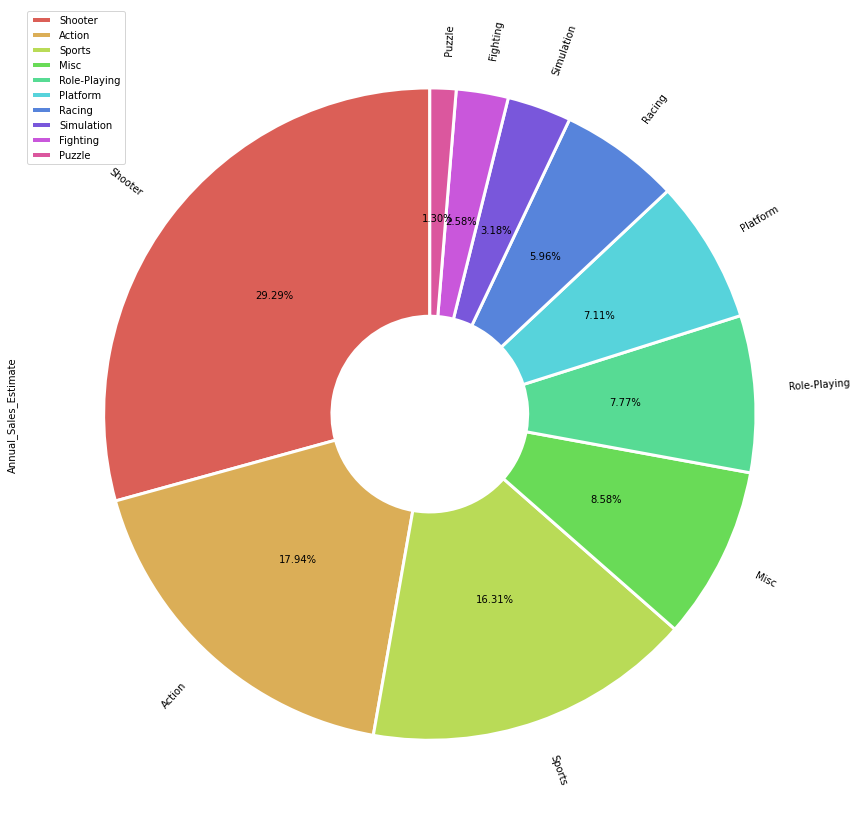

In [77]:
# Genre 점유율
grouping_G2 = Top_100_ASE.groupby(['Genre'])['Annual_Sales_Estimate'].sum()
grouping_G2 = pd.DataFrame(grouping_G2)
grouping_G2.columns = ['Annual_Sales_Estimate']
grouping_G2 = grouping_G2.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('hls',len(grouping_G2))
grouping_G2.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

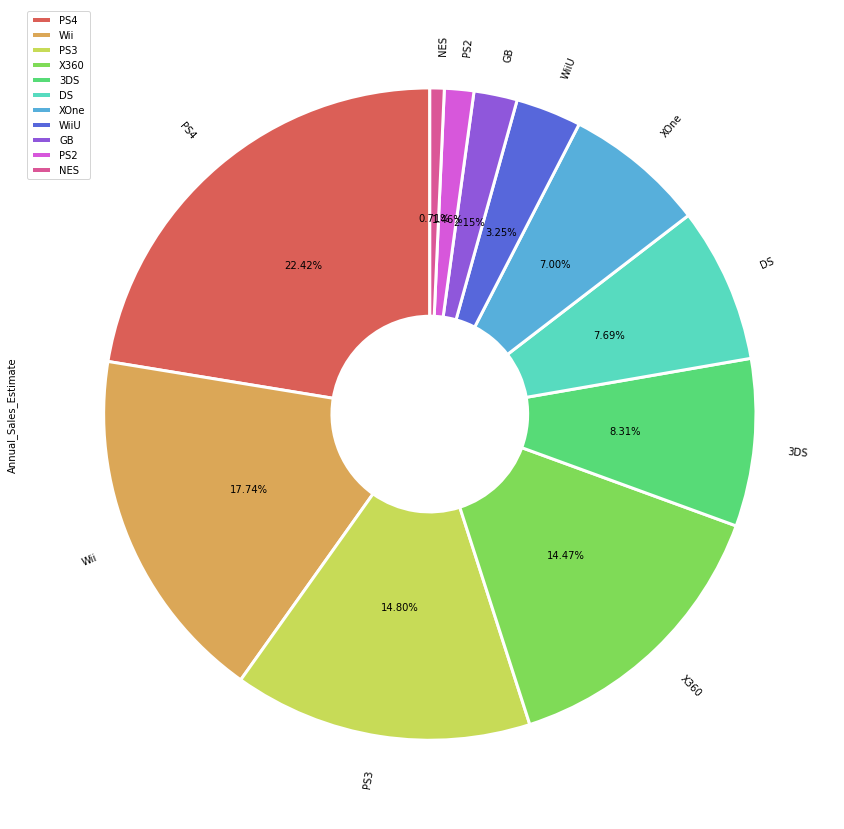

In [78]:
# Platform 점유율
grouping_F2 = Top_100_ASE.groupby(['Platform'])['Annual_Sales_Estimate'].sum()
grouping_F2 = pd.DataFrame(grouping_F2)
grouping_F2.columns = ['Annual_Sales_Estimate']
grouping_F2 = grouping_F2.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('hls',len(grouping_F2))
grouping_F2.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

각 기준별 점유율 차트를 비교하여 차이를 알아본다.

In [79]:
# 나라별 Top 100

In [80]:
# North America
sorted_NA = df.sort_values(by=['NA_Sales'], axis=0, ascending=False).reset_index(drop=True)
Top_100_NA = sorted_NA.head(100)
Top_100_NA.index = Top_100_NA.index+1
Top_100_NA

Name Platform  Year  \
1                                      Wii Sports      Wii  2006   
2                               Super Mario Bros.      NES  1985   
3                                       Duck Hunt      NES  1984   
4                                          Tetris       GB  1989   
5                                  Mario Kart Wii      Wii  2008   
6                               Wii Sports Resort      Wii  2009   
7                              Kinect Adventures!     X360  2010   
8                       New Super Mario Bros. Wii      Wii  2009   
9                                        Wii Play      Wii  2006   
10                              Super Mario World     SNES  1990   
11                          New Super Mario Bros.       DS  2006   
12                       Pokemon Red/Pokemon Blue       GB  1996   
13                               Super Mario Land       GB  1989   
14                                  Mario Kart DS       DS  2005   
15                        Call of Duty: Black Ops     X360  2010   
16                             Grand Theft Auto V     X360  2013   
17                            Super Mario Bros. 3      NES  1988   
18                  Grand Theft Auto: San Andreas      PS2  2004   
19                                   Wii Fit Plus      Wii  2009   
20                                     Nintendogs       DS  2005   
21                 Call of Duty: Modern Warfare 3     X360  2011   
22                    Pokemon Gold/Pokemon Silver       GB  1999   
23                                        Wii Fit      Wii  2007   
24                 Call of Duty: Modern Warfare 2     X360  2009   
25                    Grand Theft Auto: Vice City      PS2  2002   
26                     Call of Duty: Black Ops II     X360  2012   
27                                         Halo 3     X360  2007   
28                                        Pac-Man     2600  1982   
29                                    Halo: Reach     X360  2010   
30                             Grand Theft Auto V      PS3  2013   
31                           Grand Theft Auto III      PS2  2001   
32                                 Super Mario 64      N64  1996   
33                         Gran Turismo 3: A-Spec      PS2  2001   
34                                         Halo 2       XB  2004   
35                            Grand Theft Auto IV     X360  2008   
36                        Super Smash Bros. Brawl      Wii  2008   
37                           Call of Duty: Ghosts     X360  2013   
38                                         Halo 4     X360  2012   
39                  Pokemon Diamond/Pokemon Pearl       DS  2006   
40             Super Mario Land 2: 6 Golden Coins       GB  1992   
41                             Super Mario Galaxy      Wii  2007   
42                  Pokemon Ruby/Pokemon Sapphire      GBA  2002   
43                                   Just Dance 3      Wii  2011   
44                          Super Mario All-Stars     SNES  1993   
45                        Call of Duty: Black Ops      PS3  2010   
46                 Call of Duty 4: Modern Warfare     X360  2007   
47        Pokémon Yellow: Special Pikachu Edition       GB  1998   
48                                   Just Dance 2      Wii  2010   
49                                  GoldenEye 007      N64  1997   
50                      Call of Duty: Black Ops 3      PS4  2015   
51                                      Minecraft     X360  2013   
52                                  Mario Kart 64      N64  1996   
53                 Call of Duty: Modern Warfare 3      PS3  2011   
54                            Super Mario Bros. 2      NES  1988   
55                                 Super Mario 64       DS  2004   
56                 Call of Duty: Modern Warfare 2      PS3  2009   
57                     Call of Duty: Black Ops II      PS3  2012   
58                           Halo: Combat Evolved       XB  2001   
59                            Sup

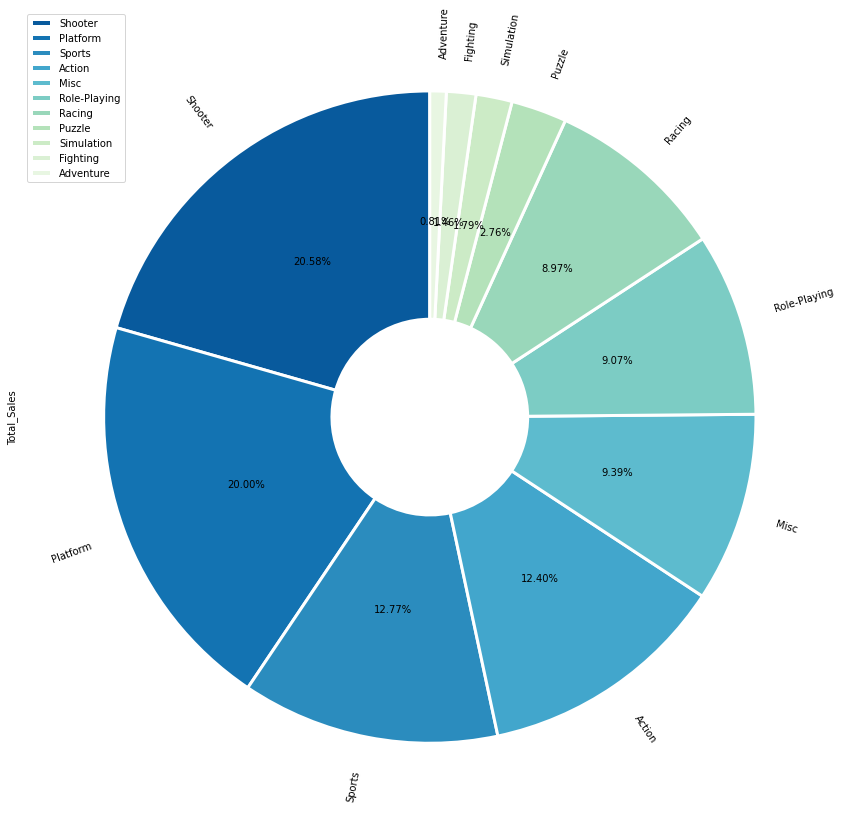

In [81]:
# Genre 점유율
grouping_G_NA = Top_100_NA.groupby(['Genre'])['Total_Sales'].sum()
grouping_G_NA = pd.DataFrame(grouping_G_NA)
grouping_G_NA.columns = ['Total_Sales']
grouping_G_NA = grouping_G_NA.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('GnBu_r',len(grouping_G_NA))
grouping_G_NA.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

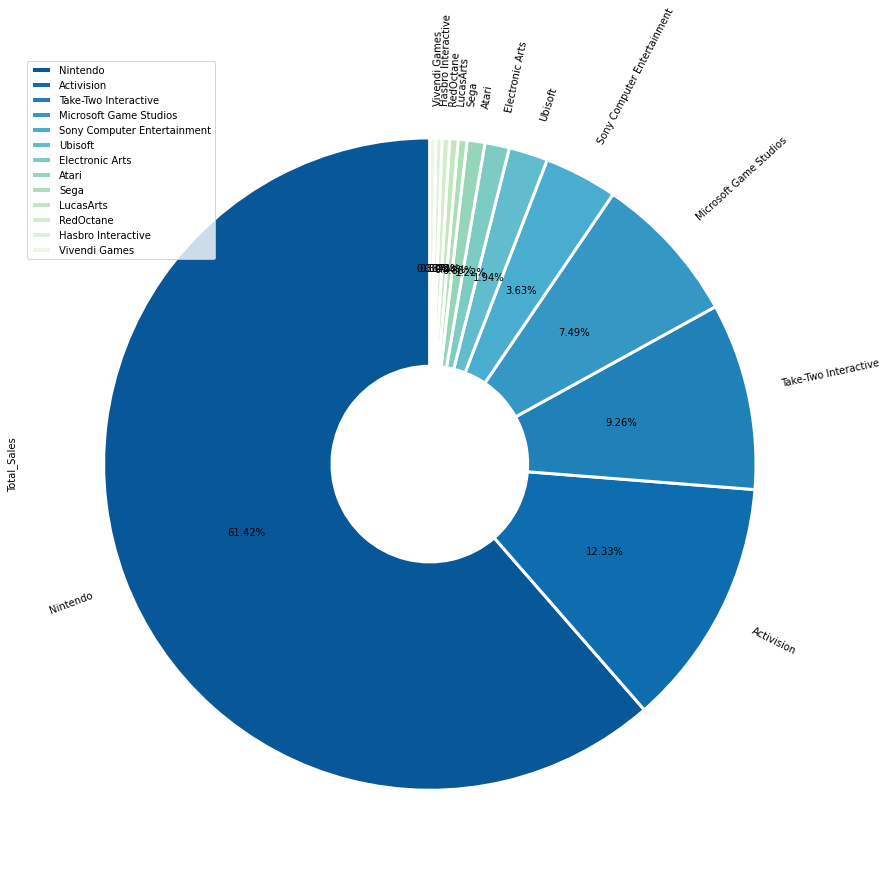

In [82]:
# Publisher 점유율
grouping_P_NA = Top_100_NA.groupby(['Publisher'])['Total_Sales'].sum()
grouping_P_NA = pd.DataFrame(grouping_P_NA)
grouping_P_NA.columns = ['Total_Sales']
grouping_P_NA = grouping_P_NA.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('GnBu_r',len(grouping_P_NA))
grouping_P_NA.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

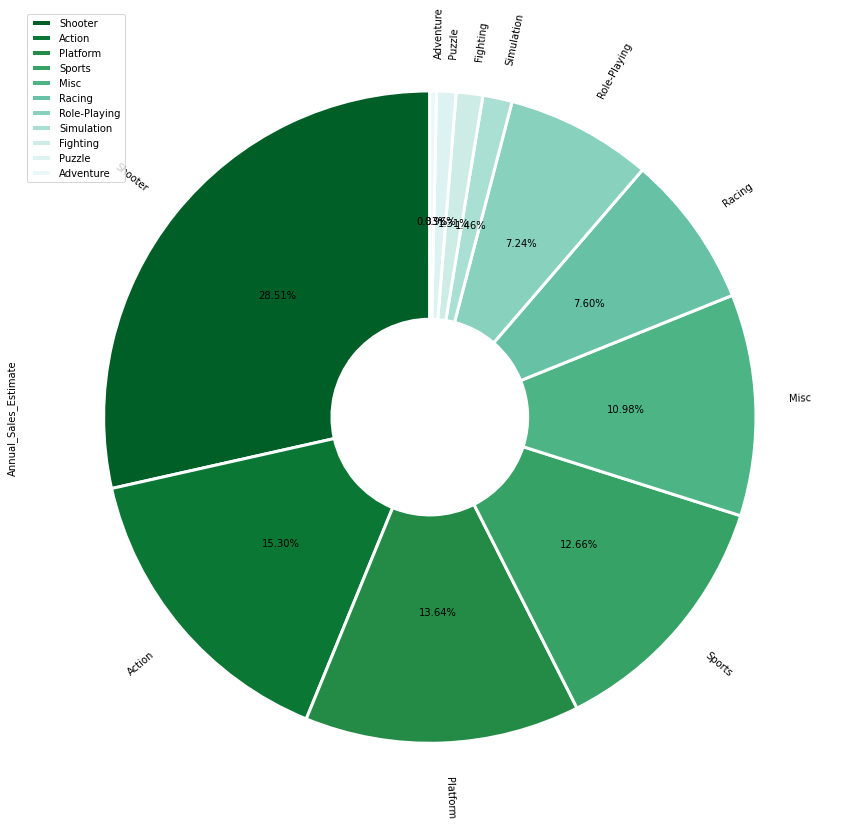

In [83]:
# Genre 점유율
grouping_G2_NA = Top_100_NA.groupby(['Genre'])['Annual_Sales_Estimate'].sum()
grouping_G2_NA = pd.DataFrame(grouping_G2_NA)
grouping_G2_NA.columns = ['Annual_Sales_Estimate']
grouping_G2_NA = grouping_G2_NA.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('BuGn_r',len(grouping_G2_NA))
grouping_G2_NA.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

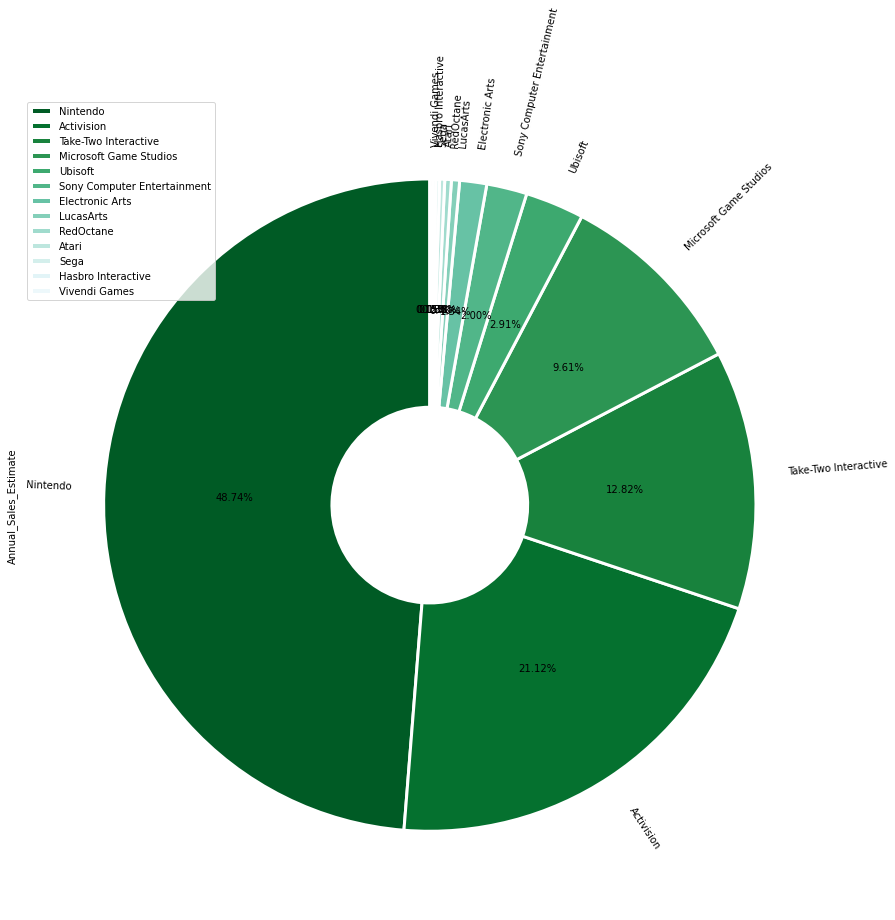

In [84]:
# Publisher 점유율
grouping_P2_NA = Top_100_NA.groupby(['Publisher'])['Annual_Sales_Estimate'].sum()
grouping_P2_NA = pd.DataFrame(grouping_P2_NA)
grouping_P2_NA.columns = ['Annual_Sales_Estimate']
grouping_P2_NA = grouping_P2_NA.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('BuGn_r',len(grouping_P2_NA))
grouping_P2_NA.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

In [85]:
# Europe
sorted_EU = df.sort_values(by=['EU_Sales'], axis=0, ascending=False).reset_index(drop=True)
Top_100_EU = sorted_EU.head(100)
Top_100_EU.index = Top_100_EU.index+1
Top_100_EU

Name Platform  Year  \
1                                      Wii Sports      Wii  2006   
2                                  Mario Kart Wii      Wii  2008   
3                               Wii Sports Resort      Wii  2009   
4                                      Nintendogs       DS  2005   
5                              Grand Theft Auto V      PS3  2013   
6    Brain Age: Train Your Brain in Minutes a Day       DS  2005   
7                           New Super Mario Bros.       DS  2006   
8                                        Wii Play      Wii  2006   
9                        Pokemon Red/Pokemon Blue       GB  1996   
10                                   Wii Fit Plus      Wii  2009   
11                                        Wii Fit      Wii  2007   
12                                  Mario Kart DS       DS  2005   
13                      New Super Mario Bros. Wii      Wii  2009   
14                                     The Sims 3       PC  2009   
15                              World of Warcraft       PC  2004   
16                    Pokemon Gold/Pokemon Silver       GB  1999   
17                                        FIFA 16      PS4  2015   
18                     Call of Duty: Black Ops II      PS3  2012   
19                 Call of Duty: Modern Warfare 3      PS3  2011   
20                             Grand Theft Auto V      PS4  2014   
21                      Call of Duty: Black Ops 3      PS4  2015   
22                    Grand Theft Auto: Vice City      PS2  2002   
23    Brain Age 2: More Training in Minutes a Day       DS  2005   
24                             Grand Theft Auto V     X360  2013   
25                         Gran Turismo 3: A-Spec      PS2  2001   
26                                 FIFA Soccer 13      PS3  2012   
27        Pokémon Yellow: Special Pikachu Edition       GB  1998   
28                             Kinect Adventures!     X360  2010   
29                                 Gran Turismo 5      PS3  2010   
30                  Pokemon Diamond/Pokemon Pearl       DS  2006   
31                           Grand Theft Auto III      PS2  2001   
32                        Call of Duty: Black Ops      PS3  2010   
33                                        FIFA 14      PS3  2013   
34                                        FIFA 12      PS3  2011   
35                     Call of Duty: Black Ops II     X360  2012   
36                                        FIFA 15      PS4  2014   
37                 Call of Duty: Modern Warfare 3     X360  2011   
38                                   Mario Kart 7      3DS  2011   
39                  Pokemon Ruby/Pokemon Sapphire      GBA  2002   
40             Mario & Sonic at the Olympic Games      Wii  2007   
41                                   Gran Turismo       PS  1997   
42                            Grand Theft Auto IV      PS3  2008   
43                              Super Mario World     SNES  1990   
44                                        FIFA 17      PS4  2016   
45                           Call of Duty: Ghosts      PS3  2013   
46                        Call of Duty: Black Ops     X360  2010   
47                 Call of Duty: Modern Warfare 2      PS3  2009   
48                 Call of Duty: Modern Warfare 2     X360  2009   
49                              Super Mario Bros.      NES  1985   
50                    Animal Crossing: Wild World       DS  2005   
51                                 FIFA Soccer 13     X360  2012   
52                            Super Mario Bros. 3      NES  1988   
53                                 Gran Turismo 2       PS  1999   
54                             Super Mario Galaxy      Wii  2007   
55      Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014   
56                 Call of Duty: Advanced Warfare      PS4  2014   
57                   Star Wars Battlefront (2015)      PS4  2015   
58                                 FIFA Soccer 11      PS3  2010   
59                               

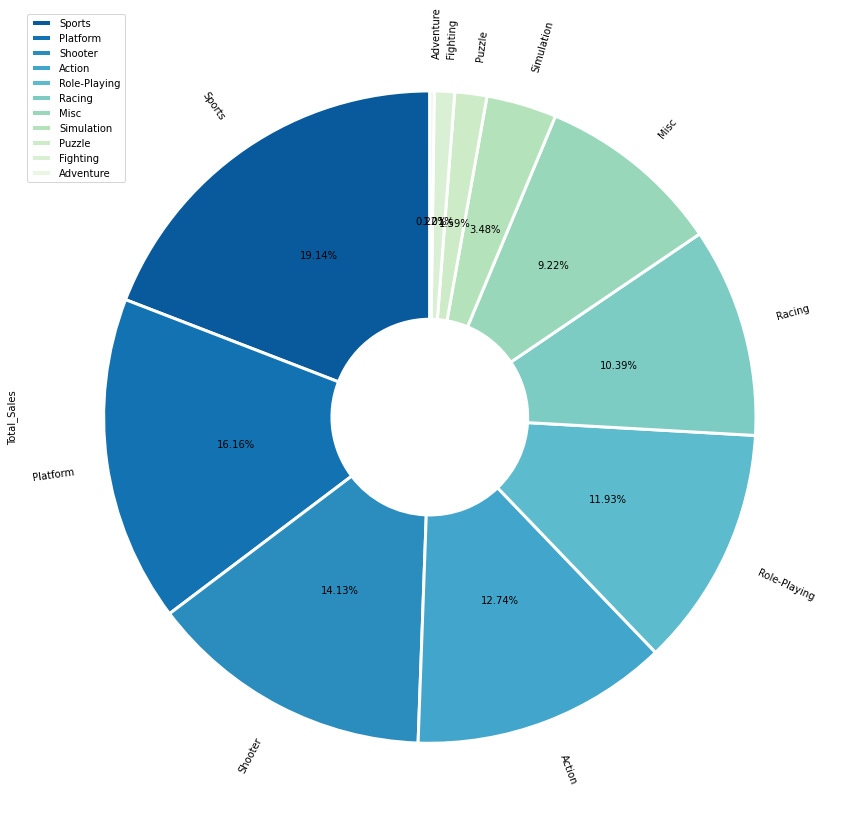

In [86]:
# Genre 점유율
grouping_G_EU = Top_100_EU.groupby(['Genre'])['Total_Sales'].sum()
grouping_G_EU = pd.DataFrame(grouping_G_EU)
grouping_G_EU.columns = ['Total_Sales']
grouping_G_EU = grouping_G_EU.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('GnBu_r',len(grouping_G_EU))
grouping_G_EU.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

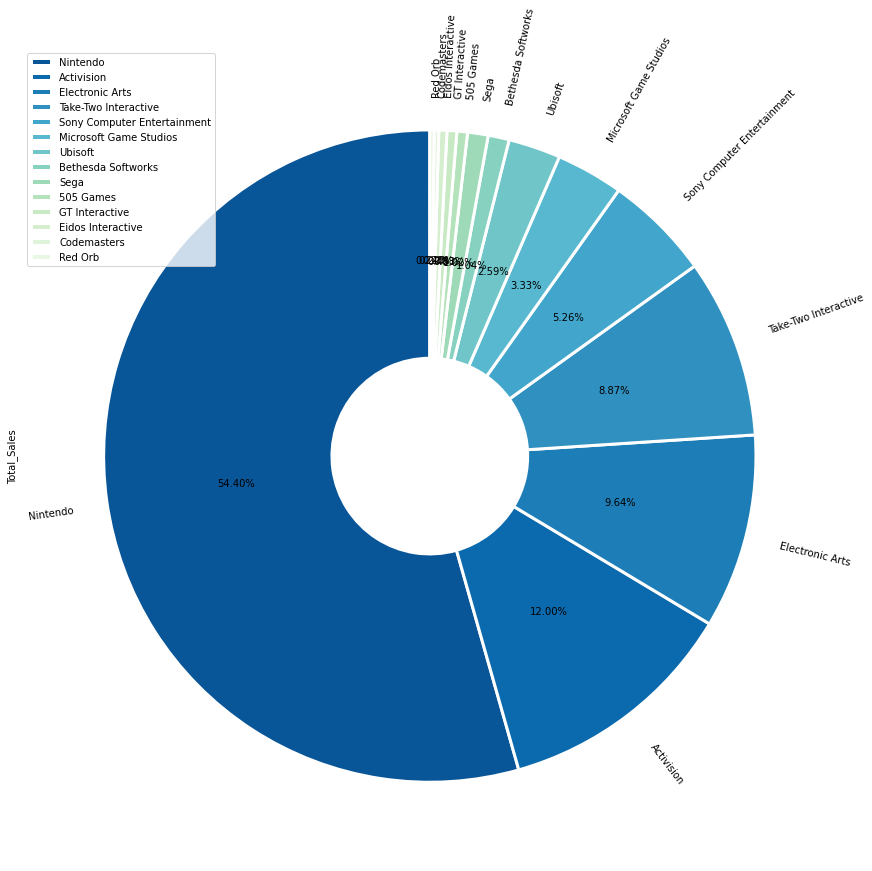

In [87]:
# Publisher 점유율
grouping_P_EU = Top_100_EU.groupby(['Publisher'])['Total_Sales'].sum()
grouping_P_EU = pd.DataFrame(grouping_P_EU)
grouping_P_EU.columns = ['Total_Sales']
grouping_P_EU = grouping_P_EU.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('GnBu_r',len(grouping_P_EU))
grouping_P_EU.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

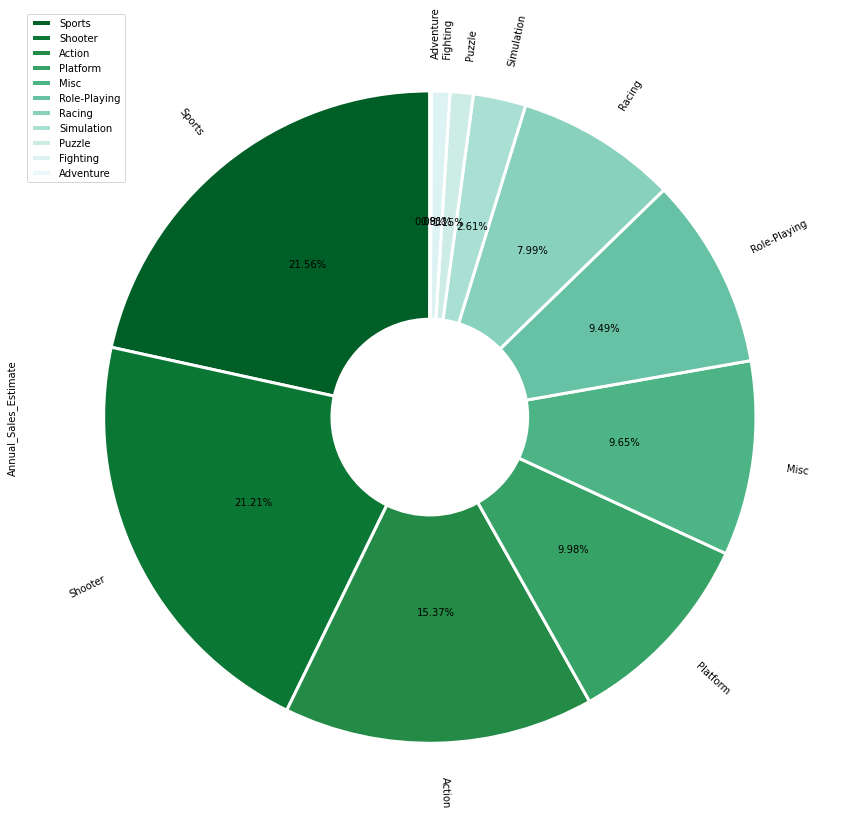

In [88]:
# Genre 점유율
grouping_G2_EU = Top_100_EU.groupby(['Genre'])['Annual_Sales_Estimate'].sum()
grouping_G2_EU = pd.DataFrame(grouping_G2_EU)
grouping_G2_EU.columns = ['Annual_Sales_Estimate']
grouping_G2_EU = grouping_G2_EU.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('BuGn_r',len(grouping_G2_EU))
grouping_G2_EU.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

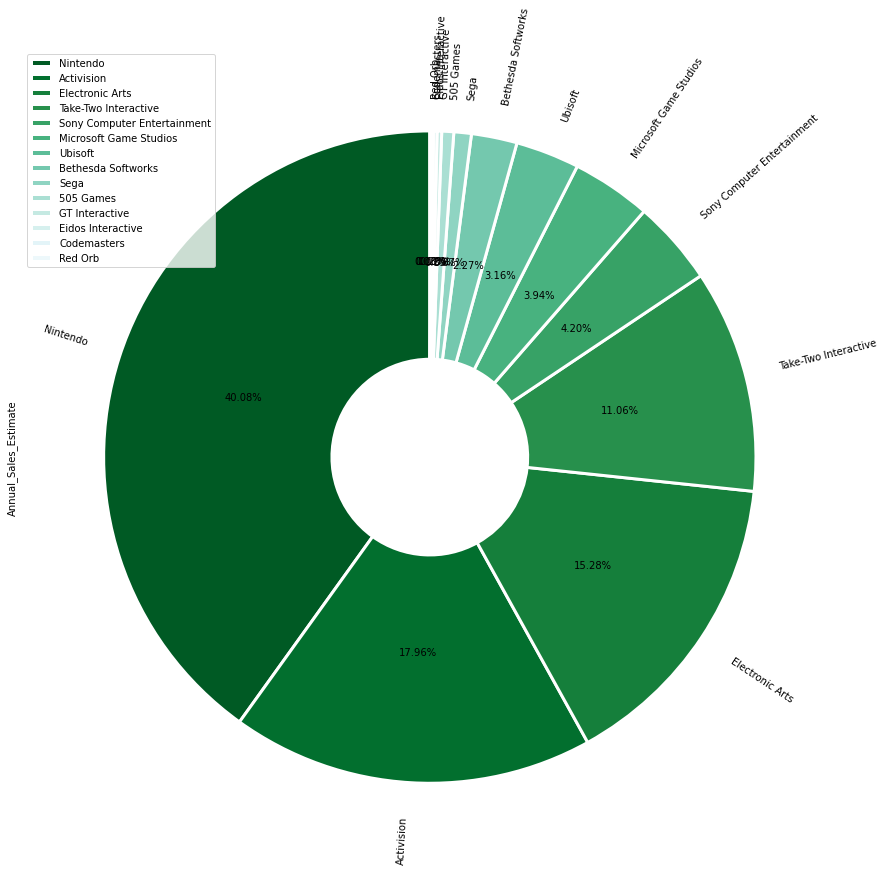

In [89]:
# Publisher 점유율
grouping_P2_EU = Top_100_EU.groupby(['Publisher'])['Annual_Sales_Estimate'].sum()
grouping_P2_EU = pd.DataFrame(grouping_P2_EU)
grouping_P2_EU.columns = ['Annual_Sales_Estimate']
grouping_P2_EU = grouping_P2_EU.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('BuGn_r',len(grouping_P2_EU))
grouping_P2_EU.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

In [90]:
# Japan
sorted_JP = df.sort_values(by=['JP_Sales'], axis=0, ascending=False).reset_index(drop=True)
Top_100_JP = sorted_JP.head(100)
Top_100_JP.index = Top_100_JP.index+1
Top_100_JP

Name Platform  Year  \
1                             Pokemon Red/Pokemon Blue       GB  1996   
2                          Pokemon Gold/Pokemon Silver       GB  1999   
3                                    Super Mario Bros.      NES  1985   
4                                New Super Mario Bros.       DS  2006   
5                        Pokemon Diamond/Pokemon Pearl       DS  2006   
6                        Pokemon Ruby/Pokemon Sapphire      GBA  2002   
7                          Animal Crossing: Wild World       DS  2005   
8          Brain Age 2: More Training in Minutes a Day       DS  2005   
9                             Monster Hunter Freedom 3      PSP  2010   
10                           New Super Mario Bros. Wii      Wii  2009   
11                           Animal Crossing: New Leaf      3DS  2012   
12      Dragon Quest IX: Sentinels of the Starry Skies       DS  2009   
13                                              Tetris       GB  1989   
14                                    Super Mario Land       GB  1989   
15        Brain Age: Train Your Brain in Minutes a Day       DS  2005   
16                                       Mario Kart DS       DS  2005   
17                        Monster Hunter Freedom Unite      PSP  2008   
18                  Dragon Quest VII: Warriors of Eden       PS  2000   
19                Pokemon HeartGold/Pokemon SoulSilver       DS  2009   
20                                 Super Mario Bros. 3      NES  1988   
21                                    Super Mario Kart     SNES  1992   
22                                      Mario Kart Wii      Wii  2008   
23                                          Wii Sports      Wii  2006   
24                                  Dragon Warrior III      NES  1988   
25                                   Friend Collection       DS  2009   
26                                  Final Fantasy VIII       PS  1999   
27       Dragon Quest VIII: Journey of the Cursed King      PS2  2004   
28                                             Wii Fit      Wii  2007   
29                                   Super Mario World     SNES  1990   
30                                    Monster Hunter 4      3DS  2013   
31                                   Final Fantasy VII       PS  1997   
32                                   Wii Sports Resort      Wii  2009   
33                Dragon Quest VI: Maboroshi no Daichi     SNES  1995   
34                           Yokai Watch 2 Ganso/Honke      3DS  2014   
35                   Pokemon FireRed/Pokemon LeafGreen      GBA  2004   
36                     Pokemon Black 2/Pokemon White 2       DS  2012   
37             Pokémon Yellow: Special Pikachu Edition       GB  1998   
38           Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014   
39                                   Dragon Warrior IV      NES  1990   
40                                 Donkey Kong Country     SNES  1994   
41                                            Wii Play      Wii  2006   
42                Street Fighter II: The World Warrior     SNES  1992   
43                                    Monster Hunter X      3DS  2015   
44                  Dragon Quest V: Tenkuu no Hanayome     SNES  1992   
45                                    Final Fantasy IX       PS  2000   
46                                     Final Fantasy X      PS2  2001   
47                  Super Mario Land 2: 6 Golden Coins       GB  1992   
48                            Pokémon Platinum Version       DS  2008   
49                              Yokai Watch 2 Shinuchi      3DS  2014   
50                                        Mario Kart 7      3DS  2011   
51                             Super Smash Bros. Brawl      Wii  2008   
52                  Super Mario Bros.: The Lost Levels      NES  1986   
53                           Monster Hunter 4 Ultimate      3DS  2014   
54                                   Final Fantasy III     SNES  1994   
55                                 

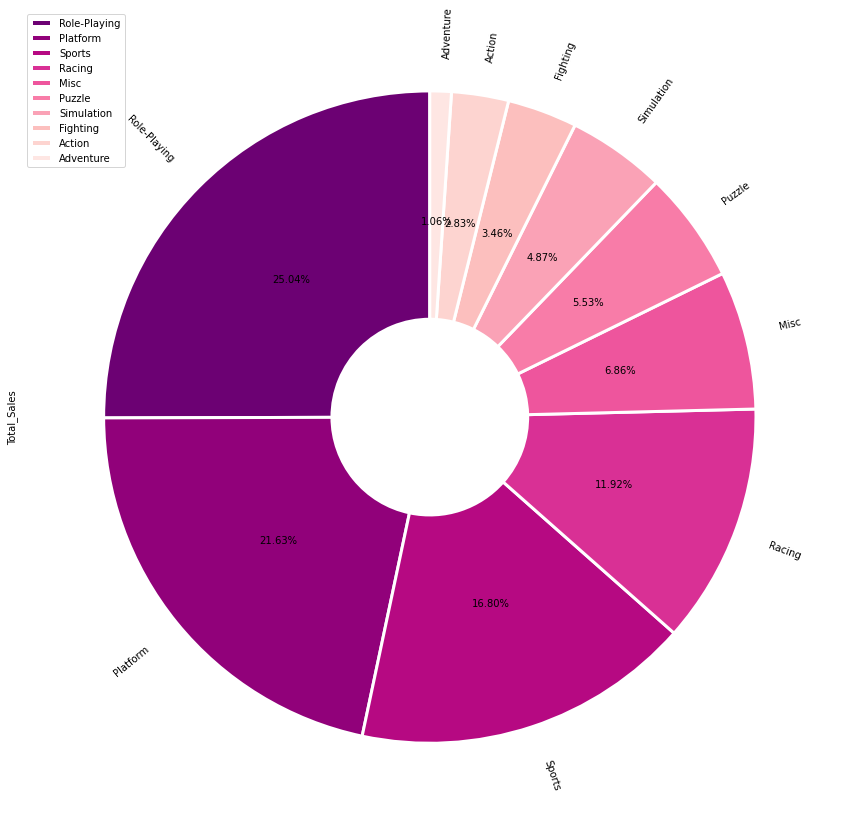

In [173]:
# Genre 점유율
grouping_G_JP = Top_100_JP.groupby(['Genre'])['Total_Sales'].sum()
grouping_G_JP = pd.DataFrame(grouping_G_JP)
grouping_G_JP.columns = ['Total_Sales']
grouping_G_JP = grouping_G_JP.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('RdPu_r',len(grouping_G_JP))
grouping_G_JP.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

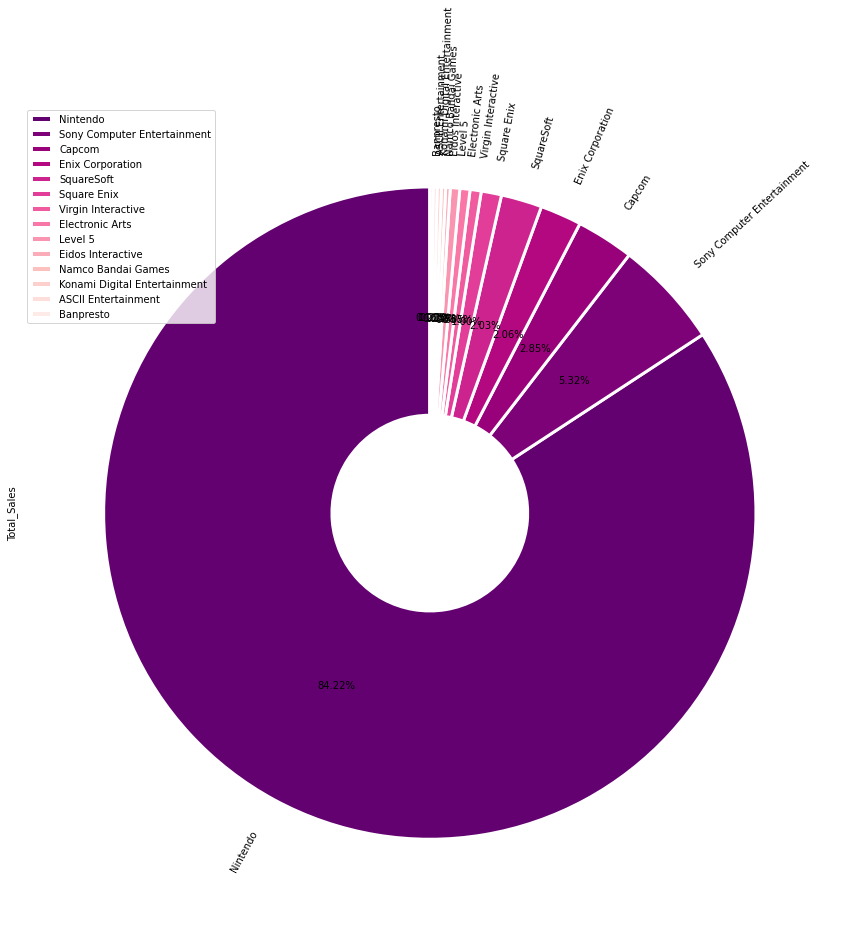

In [174]:
# Publisher 점유율
grouping_P_JP = Top_100_JP.groupby(['Publisher'])['Total_Sales'].sum()
grouping_P_JP = pd.DataFrame(grouping_P_JP)
grouping_P_JP.columns = ['Total_Sales']
grouping_P_JP = grouping_P_JP.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('RdPu_r',len(grouping_P_JP))
grouping_P_JP.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

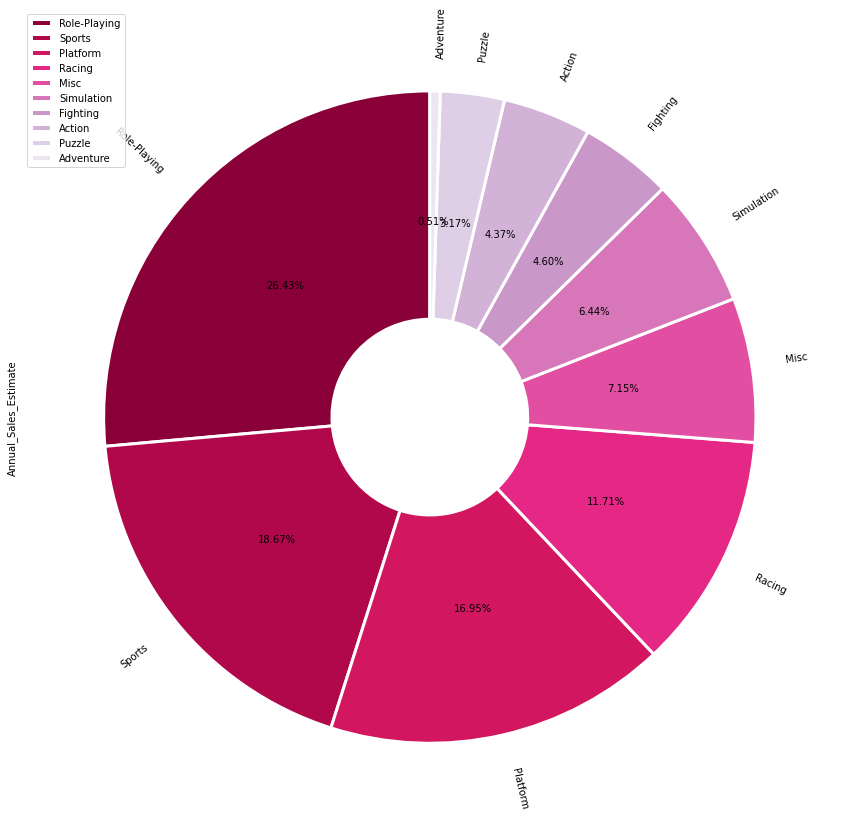

In [175]:
# Genre 점유율
grouping_G2_JP = Top_100_JP.groupby(['Genre'])['Annual_Sales_Estimate'].sum()
grouping_G2_JP = pd.DataFrame(grouping_G2_JP)
grouping_G2_JP.columns = ['Annual_Sales_Estimate']
grouping_G2_JP = grouping_G2_JP.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('PuRd_r',len(grouping_G2_JP))
grouping_G2_JP.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

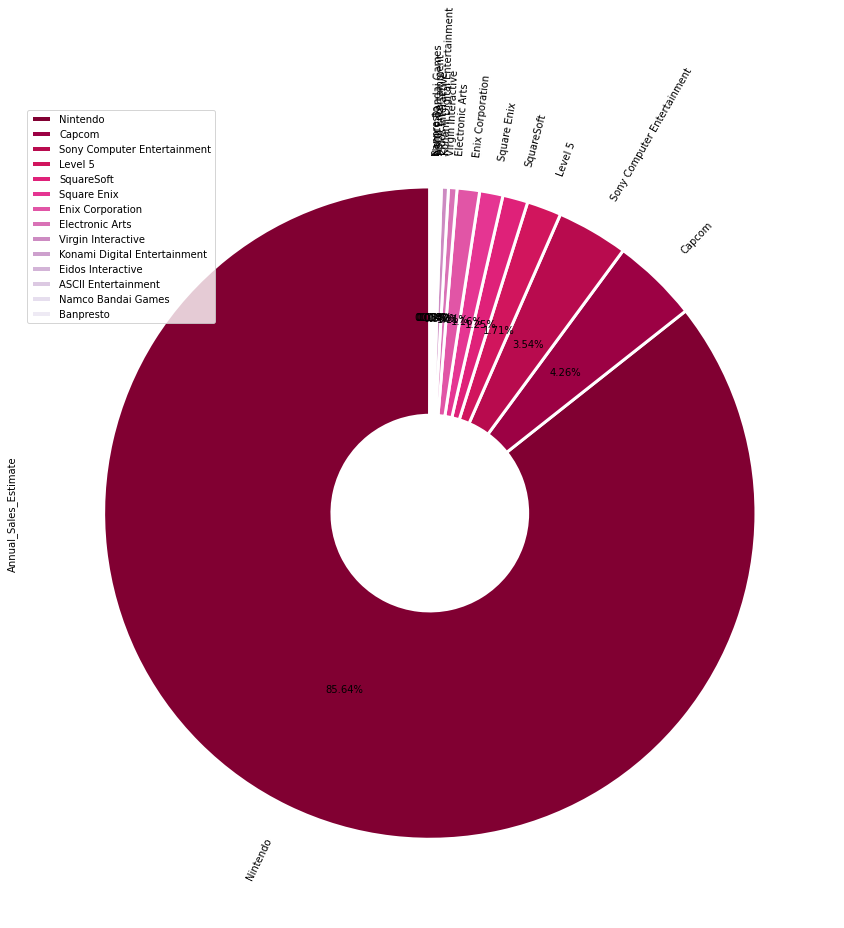

In [176]:
# Publisher 점유율
grouping_P2_JP = Top_100_JP.groupby(['Publisher'])['Annual_Sales_Estimate'].sum()
grouping_P2_JP = pd.DataFrame(grouping_P2_JP)
grouping_P2_JP.columns = ['Annual_Sales_Estimate']
grouping_P2_JP = grouping_P2_JP.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('PuRd_r',len(grouping_P2_JP))
grouping_P2_JP.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

In [95]:
# Other
sorted_Other = df.sort_values(by=['Other_Sales'], axis=0, ascending=False).reset_index(drop=True)
Top_100_Other = sorted_Other.head(100)
Top_100_Other.index = Top_100_Other.index+1
Top_100_Other

Name Platform  Year  \
1                   Grand Theft Auto: San Andreas      PS2  2004   
2                                      Wii Sports      Wii  2006   
3                                  Gran Turismo 4      PS2  2004   
4                              Grand Theft Auto V      PS3  2013   
5                                  Mario Kart Wii      Wii  2008   
6                               Wii Sports Resort      Wii  2009   
7                       Pro Evolution Soccer 2008      PS2  2007   
8                           New Super Mario Bros.       DS  2006   
9                                        Wii Play      Wii  2006   
10                                     Nintendogs       DS  2005   
11                     Call of Duty: Black Ops II      PS3  2012   
12                                 FIFA Soccer 08      PS2  2007   
13                      Call of Duty: Black Ops 3      PS4  2015   
14                      New Super Mario Bros. Wii      Wii  2009   
15                                        Wii Fit      Wii  2007   
16                                 Gran Turismo 5      PS3  2010   
17   Brain Age: Train Your Brain in Minutes a Day       DS  2005   
18                 PES 2009: Pro Evolution Soccer      PS2  2008   
19                             Grand Theft Auto V      PS4  2014   
20                                 FIFA Soccer 13      PS3  2012   
21                Metal Gear Solid 3: Snake Eater      PS2  2004   
22                                  Mario Kart DS       DS  2005   
23                        Call of Duty: Black Ops      PS3  2010   
24                                 FIFA Soccer 09      PS2  2008   
25                                   Wii Fit Plus      Wii  2009   
26                    Grand Theft Auto: Vice City      PS2  2002   
27         Grand Theft Auto: Liberty City Stories      PSP  2005   
28                                        FIFA 14      PS3  2013   
29                      Need for Speed: ProStreet      PS2  2007   
30                                  God of War II      PS2  2007   
31                             Kinect Adventures!     X360  2010   
32                 Call of Duty: Modern Warfare 2      PS3  2009   
33                            Grand Theft Auto IV      PS3  2008   
34                 Call of Duty: Modern Warfare 3      PS3  2011   
35                                 Dragon Warrior      NES  1986   
36               Guitar Hero III: Legends of Rock      PS2  2007   
37                                        FIFA 15      PS4  2014   
38                                        FIFA 12      PS3  2011   
39                      WWE SmackDown vs Raw 2008      PS2  2007   
40                             Grand Theft Auto V     X360  2013   
41                           Call of Duty: Ghosts      PS3  2013   
42                 Call of Duty: Advanced Warfare      PS4  2014   
43                  Pokemon Diamond/Pokemon Pearl       DS  2006   
44                  High School Musical: Sing It!      PS2  2007   
45                 Call of Duty: Modern Warfare 3     X360  2011   
46                           Grand Theft Auto III      PS2  2001   
47                 Call of Duty: Modern Warfare 2     X360  2009   
48                                        FIFA 16      PS4  2015   
49                                 FIFA Soccer 10      PS2  2009   
50                   Star Wars Battlefront (2015)      PS4  2015   
51                                         Halo 3     X360  2007   
52            Grand Theft Auto: Vice City Stories      PSP  2006   
53    Brain Age 2: More Training in Minutes a Day       DS  2005   
54      World of Warcraft: Wrath of the Lich King       PC  2008   
55                      Pro Evolution Soccer 2010      PS2  2009   
56                         Gran Turismo 3: A-Spec      PS2  2001   
57                           Assassin's Creed III      PS3  2012   
58                              The Simpsons Game      PS2  2007   
59                               

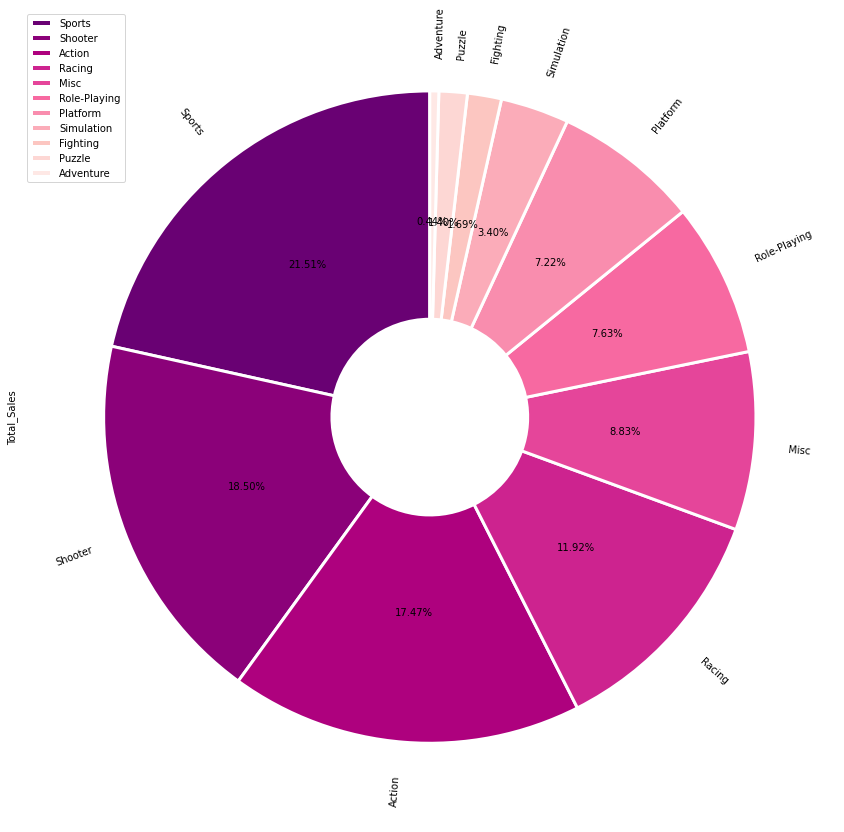

In [178]:
# Genre 점유율
grouping_G_Other = Top_100_Other.groupby(['Genre'])['Total_Sales'].sum()
grouping_G_Other = pd.DataFrame(grouping_G_Other)
grouping_G_Other.columns = ['Total_Sales']
grouping_G_Other = grouping_G_Other.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('RdPu_r',len(grouping_G_Other))
grouping_G_Other.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

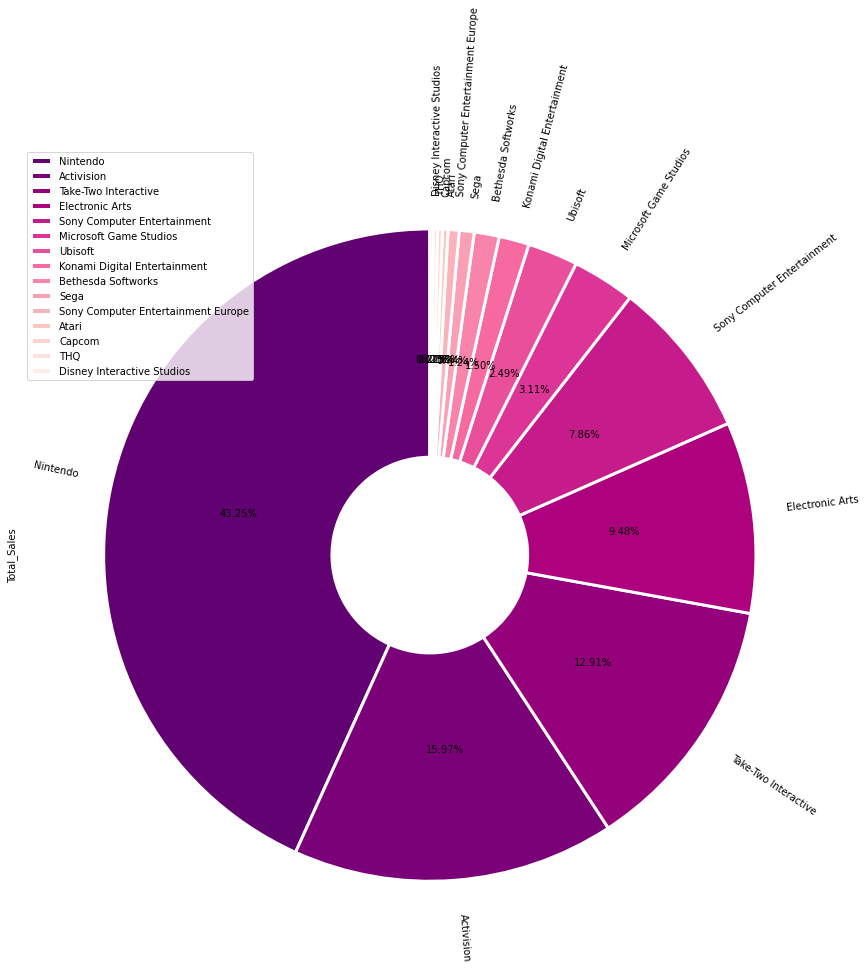

In [179]:
# Publisher 점유율
grouping_P_Other = Top_100_Other.groupby(['Publisher'])['Total_Sales'].sum()
grouping_P_Other = pd.DataFrame(grouping_P_Other)
grouping_P_Other.columns = ['Total_Sales']
grouping_P_Other = grouping_P_Other.sort_values(by=['Total_Sales'], axis=0, ascending=False)

colors = sns.color_palette('RdPu_r',len(grouping_P_Other))
grouping_P_Other.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

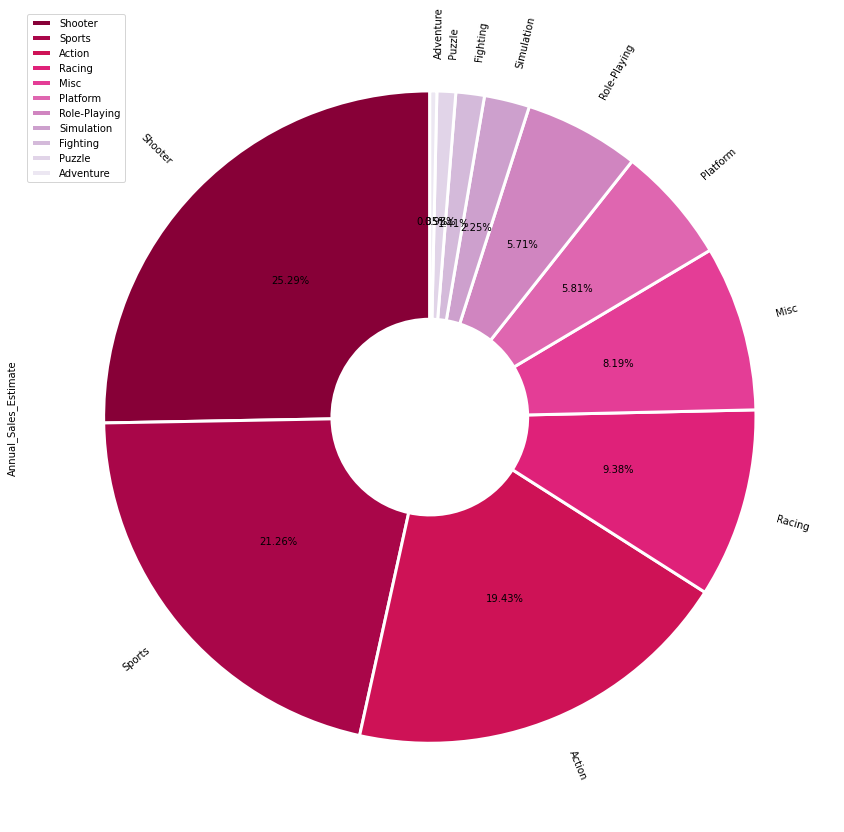

In [180]:
# Genre 점유율
grouping_G2_Other = Top_100_Other.groupby(['Genre'])['Annual_Sales_Estimate'].sum()
grouping_G2_Other = pd.DataFrame(grouping_G2_Other)
grouping_G2_Other.columns = ['Annual_Sales_Estimate']
grouping_G2_Other = grouping_G2_Other.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('PuRd_r',len(grouping_G2_Other))
grouping_G2_Other.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

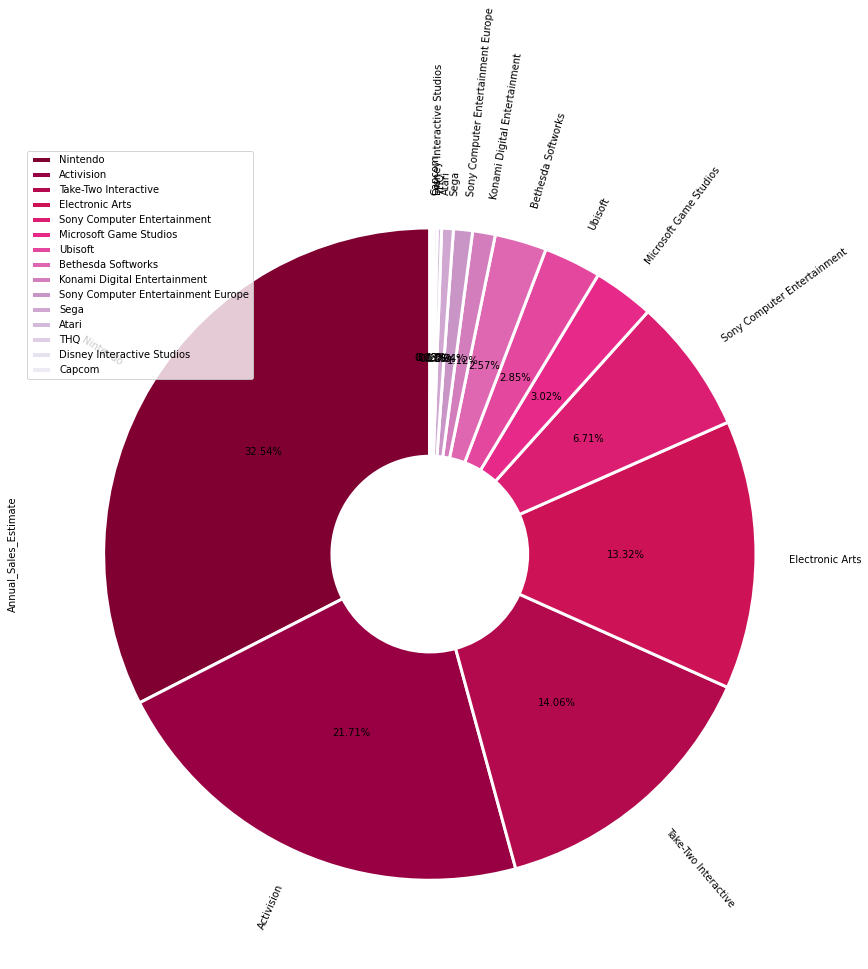

In [181]:
# Publisher 점유율
grouping_P2_Other = Top_100_Other.groupby(['Publisher'])['Annual_Sales_Estimate'].sum()
grouping_P2_Other = pd.DataFrame(grouping_P2_Other)
grouping_P2_Other.columns = ['Annual_Sales_Estimate']
grouping_P2_Other = grouping_P2_Other.sort_values(by=['Annual_Sales_Estimate'], axis=0, ascending=False)

colors = sns.color_palette('PuRd_r',len(grouping_P2_Other))
grouping_P2_Other.plot.pie(subplots=True,
                    figsize=(15, 15), # 차트 사이즈
                    textprops={'size': 10}, # text 사이즈
                    rotatelabels=True, # label 기울기
                    startangle = 90, # 차트 각도
                    autopct='%.2f%%', # %표시
                    colors=colors, # 차트 색상
                    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}) # 차트 사이 간격
plt.legend(loc='upper left');

#plt.subplots_adjust(hspace=0.8)

In [100]:
# 가설: North America Sales > EU,JP,Other Sales
# 귀무가설: North America Sales <= EU,JP,Other Sales
# 대립가설: North America Sales > EU,JP,Other Sales
# NA시장을 공략해도 되는지 글로벌 다 고려해야 하는지

In [101]:
hypo_df = df
hypo_df['Non_NA_Sales'] = df.EU_Sales + df.JP_Sales + df.Other_Sales
hypo_df.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  \
0           Destineer      0.04      0.00      0.00         0.00         0.04   
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18   
2           Alchemist      0.00      0.00      0.02         0.00         0.02   
3           Zoo Games      0.04      0.00      0.00         0.00         0.04   
4         D3Publisher      0.12      0.09      0.00         0.04         0.25   

   Annual_Sales_Estimate  Non_NA_Sales  
0                0.00400          0.00  
1                0.02000          0.01  
2                0.00250          0.02  
3                0.00500          0.00  
4                0.03125          0.13

In [102]:
# 표본분포
pop_ratio = hypo_df.mean();
pop_var = hypo_df.var();
pop_std = hypo_df.std();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [103]:
print(pop_ratio*(1-pop_ratio)); # 모집단 분산

Year                    -4.023657e+06
NA_Sales                 1.948481e-01
EU_Sales                 1.256223e-01
JP_Sales                 7.187887e-02
Other_Sales              4.590039e-02
Total_Sales              2.485050e-01
Annual_Sales_Estimate    5.435326e-02
Non_NA_Sales             1.987022e-01
dtype: float64


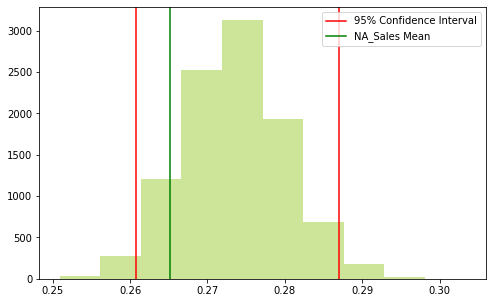

In [104]:
means = []

np.random.seed(42)

for _ in range(10000):
  sample = np.random.choice(hypo_df.Non_NA_Sales, len(hypo_df), replace=True)
  means.append(sample.mean())

NA_mean = np.array(hypo_df.NA_Sales).mean()
lower, upper = np.percentile(means, 2.5), np.percentile(means, 97.5) 

plt.figure(figsize=(8,5))
plt.hist(means, alpha=.5, color='yellowgreen')
plt.axvline(lower, c='red', label='95% Confidence Interval')
plt.axvline(upper, c='red')
plt.axvline(NA_mean, c='green', label='NA_Sales Mean')
plt.legend();

In [105]:
print(lower, upper, NA_mean)

0.2607486214374225 0.28699877633209414 0.2651555142503098


In [106]:
# 위 분포를 통해 Non_NA_Sales의 모수가 0.261~0.287(m) 사이에 있을 확률은 95%
# 귀무가설: North America Sales <= EU,JP,Other Sales 채택
# 글로벌 모두 고려해야함

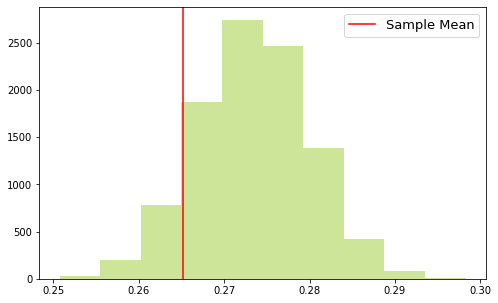

In [107]:
# P value
sample_std = np.std(means)
Non_NA_mean = np.array(hypo_df.Non_NA_Sales).mean()

plt.figure(figsize=(8,5))
null_vals = np.random.normal(Non_NA_mean, sample_std, 10000) 
plt.hist(null_vals, alpha=0.5, color='yellowgreen')
plt.axvline(NA_mean, color='r', label='Sample Mean')
plt.legend(fontsize=13);

In [108]:
(null_vals > NA_mean).mean()

0.894

In [109]:
# PCA

In [110]:
df.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  \
0           Destineer      0.04      0.00      0.00         0.00         0.04   
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18   
2           Alchemist      0.00      0.00      0.02         0.00         0.02   
3           Zoo Games      0.04      0.00      0.00         0.00         0.04   
4         D3Publisher      0.12      0.09      0.00         0.04         0.25   

   Annual_Sales_Estimate  Non_NA_Sales  
0                0.00400          0.00  
1                0.02000          0.01  
2                0.00250          0.02  
3                0.00500          0.00  
4                0.03125          0.13

In [111]:
pca_df = df.iloc[:,-7:-1]

scaler = StandardScaler()
Z = scaler.fit_transform(pca_df)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA() 
pca.fit(Z)

B = pca.transform(Z)

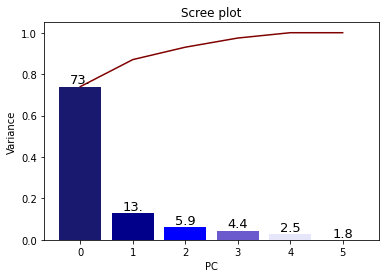

In [112]:
pca.explained_variance_ratio_

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['midnightblue', 'darkblue', 'blue', 'slateblue', 'lavender']) # Bar plot
    ax.plot(ind, cumvals, color = 'maroon') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [113]:
# Clusering

In [114]:
clustering_df = df.drop('Non_NA_Sales', axis=1)
clustering_df.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  \
0           Destineer      0.04      0.00      0.00         0.00         0.04   
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18   
2           Alchemist      0.00      0.00      0.02         0.00         0.02   
3           Zoo Games      0.04      0.00      0.00         0.00         0.04   
4         D3Publisher      0.12      0.09      0.00         0.04         0.25   

   Annual_Sales_Estimate  
0                0.00400  
1                0.02000  
2                0.00250  
3                0.00500  
4                0.03125

In [115]:
clustering_df.describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales   Total_Sales  \
count  16140.000000  16140.000000  16140.000000  16140.000000  16140.000000   
mean       0.265156      0.147328      0.077956      0.048226      0.538665   
std        0.822646      0.508494      0.306779      0.189945      1.562204   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.060000   
50%        0.080000      0.020000      0.000000      0.010000      0.170000   
75%        0.240000      0.110000      0.040000      0.040000      0.480000   
max       41.490000     29.020000     10.220000     10.570000     82.740000   

       Annual_Sales_Estimate  
count           16140.000000  
mean                0.057680  
std                 0.175170  
min                 0.000000  
25%                 0.006000  
50%                 0.016250  
75%                 0.046154  
max                 6.895000

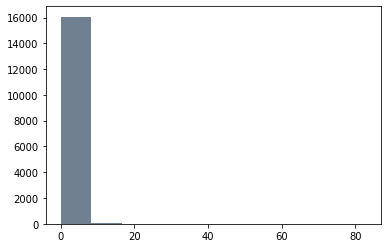

In [116]:
plt.hist(clustering_df.Total_Sales, color='slategray');

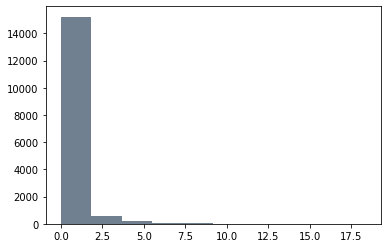

In [117]:
plt.hist(clustering_df.Total_Sales[clustering_df.Total_Sales < 20], color='slategray');

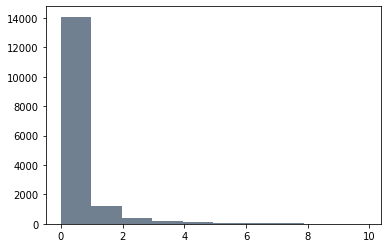

In [118]:
plt.hist(clustering_df.Total_Sales[clustering_df.Total_Sales < 10], color='slategray');

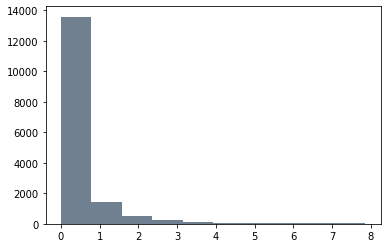

In [119]:
plt.hist(clustering_df.Total_Sales[clustering_df.Total_Sales < 8], color='slategray');

In [120]:
less_8 = clustering_df[clustering_df.Total_Sales < 8]
larger_8 = clustering_df[clustering_df.Total_Sales  >= 8]
len(less_8), len(larger_8)

(16057, 83)

In [121]:
len(larger_8) / len(less_8)

0.005169085134209379

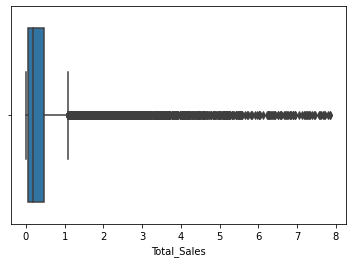

In [122]:
clustering_df = clustering_df.drop(index = clustering_df[clustering_df.Total_Sales >= 8].index)
sns.boxplot(x=clustering_df.Total_Sales);

In [123]:
len(clustering_df[clustering_df.Total_Sales > 1]), len(clustering_df[clustering_df.Total_Sales <= 1])

(1926, 14131)

In [124]:
clustering_df.Total_Sales.describe()

count    16057.000000
mean         0.459489
std          0.823044
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max          7.860000
Name: Total_Sales, dtype: float64

In [125]:
clustering_df.Annual_Sales_Estimate.describe()

count    16057.000000
mean         0.049983
std          0.114690
min          0.000000
25%          0.006000
50%          0.016250
75%          0.045000
max          2.556667
Name: Annual_Sales_Estimate, dtype: float64

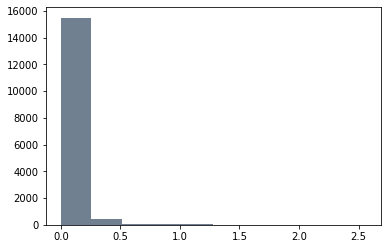

In [126]:
plt.hist(clustering_df.Annual_Sales_Estimate, color='slategray');

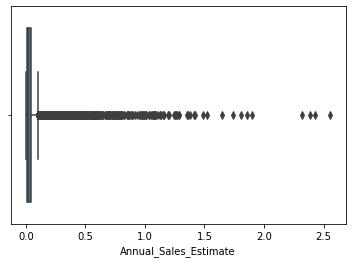

In [127]:
sns.boxplot(x=clustering_df.Annual_Sales_Estimate);

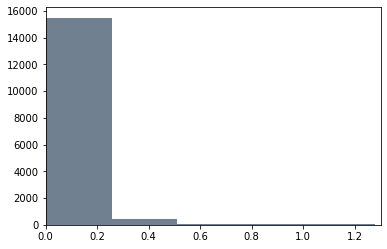

In [128]:
plt.hist(clustering_df.Annual_Sales_Estimate, color='slategray')
plt.xlim(0, 1.3);

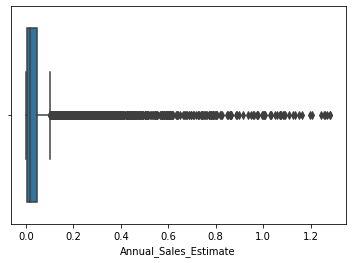

In [129]:
clustering_df = clustering_df.drop(index = clustering_df[clustering_df.Annual_Sales_Estimate >= 1.3].index)
sns.boxplot(x=clustering_df.Annual_Sales_Estimate);

In [130]:
clustering_df.Annual_Sales_Estimate.describe()

count    16041.000000
mean         0.048250
std          0.099934
min          0.000000
25%          0.006000
50%          0.016190
75%          0.045000
max          1.283333
Name: Annual_Sales_Estimate, dtype: float64

In [131]:
cleaned_data = clustering_df.copy()

In [132]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16041 entries, 0 to 16139
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16041 non-null  object 
 1   Platform               16041 non-null  object 
 2   Year                   16041 non-null  object 
 3   Genre                  16041 non-null  object 
 4   Publisher              16041 non-null  object 
 5   NA_Sales               16041 non-null  float64
 6   EU_Sales               16041 non-null  float64
 7   JP_Sales               16041 non-null  float64
 8   Other_Sales            16041 non-null  float64
 9   Total_Sales            16041 non-null  float64
 10  Annual_Sales_Estimate  16041 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [133]:
cleaned_data.describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales   Total_Sales  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.224882      0.122078      0.066932      0.040177      0.454070   
std        0.437424      0.283565      0.221906      0.104869      0.804167   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.060000   
50%        0.080000      0.020000      0.000000      0.010000      0.170000   
75%        0.230000      0.110000      0.040000      0.030000      0.470000   
max        7.280000      6.210000      4.870000      2.930000      7.860000   

       Annual_Sales_Estimate  
count           16041.000000  
mean                0.048250  
std                 0.099934  
min                 0.000000  
25%                 0.006000  
50%                 0.016190  
75%                 0.045000  
max                 1.283333

In [134]:
# Primary Key = Genre
# Annual이 큰 장르일수록 Total도 크다고 판단
# 출시 개수가 많을 수록 Total이 크다고 판단

In [135]:
rfm_r = cleaned_data.groupby('Publisher', as_index=False)['Annual_Sales_Estimate'].max()
rfm_r.head()

Publisher  Annual_Sales_Estimate
0               10TACLE Studios               0.005455
1                    1C Company               0.007143
2  20th Century Fox Video Games               0.021351
3                        2D Boy               0.004000
4                           3DO               0.067368

In [136]:
rfm_f = cleaned_data.groupby('Publisher', as_index=False)['Total_Sales'].max()
rfm_f.head()

Publisher  Total_Sales
0               10TACLE Studios         0.06
1                    1C Company         0.05
2  20th Century Fox Video Games         0.79
3                        2D Boy         0.04
4                           3DO         1.28

In [137]:
rfm_m = cleaned_data.groupby('Publisher', as_index=False)['Name'].count()
rfm_m.columns = ['Publisher','Count']
rfm_m.head()

Publisher  Count
0               10TACLE Studios      3
1                    1C Company      3
2  20th Century Fox Video Games      5
3                        2D Boy      1
4                           3DO     36

In [138]:
rfm_r.head()

Publisher  Annual_Sales_Estimate
0               10TACLE Studios               0.005455
1                    1C Company               0.007143
2  20th Century Fox Video Games               0.021351
3                        2D Boy               0.004000
4                           3DO               0.067368

In [139]:
rfm = pd.merge(rfm_r,rfm_f, on='Publisher', how='inner')
rfm = pd.merge(rfm,rfm_m, on='Publisher', how='inner')
rfm.columns = ['Publisher', 'Annual', 'Total', 'Count']
rfm.head()

Publisher    Annual  Total  Count
0               10TACLE Studios  0.005455   0.06      3
1                    1C Company  0.007143   0.05      3
2  20th Century Fox Video Games  0.021351   0.79      5
3                        2D Boy  0.004000   0.04      1
4                           3DO  0.067368   1.28     36

In [140]:
rfm.describe()

Annual       Total        Count
count  573.000000  573.000000   573.000000
mean     0.074592    0.694642    27.994764
std      0.193952    1.395893   113.631451
min      0.000385    0.010000     1.000000
25%      0.005000    0.050000     1.000000
50%      0.015556    0.170000     3.000000
75%      0.053182    0.620000    10.000000
max      1.283333    7.860000  1321.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



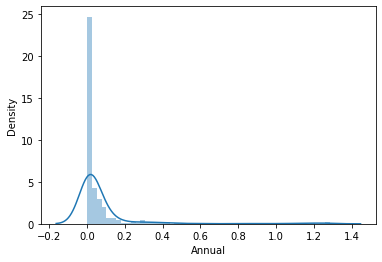

In [141]:
sns.distplot(rfm['Annual']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



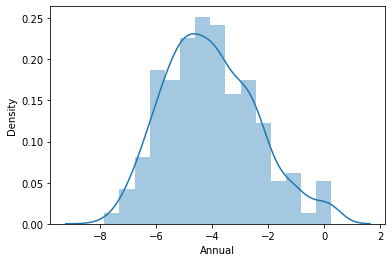

In [142]:
Annual_log = np.log(rfm['Annual'])
sns.distplot(Annual_log);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



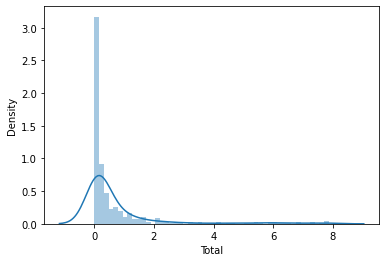

In [143]:
sns.distplot(rfm['Total']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



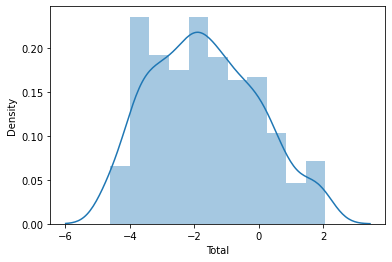

In [144]:
Total_log = np.log(rfm['Total'])
sns.distplot(Total_log);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



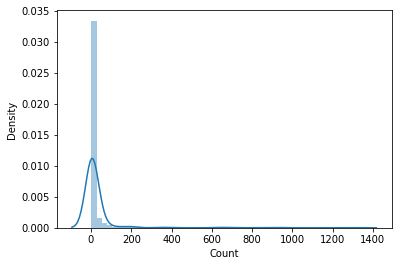

In [145]:
sns.distplot(rfm['Count']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



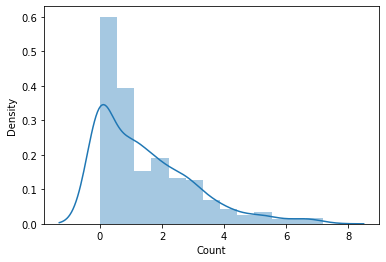

In [146]:
Count_log = np.log(rfm['Count'])
sns.distplot(Count_log);

In [147]:
rfm.head()

Publisher    Annual  Total  Count
0               10TACLE Studios  0.005455   0.06      3
1                    1C Company  0.007143   0.05      3
2  20th Century Fox Video Games  0.021351   0.79      5
3                        2D Boy  0.004000   0.04      1
4                           3DO  0.067368   1.28     36

In [148]:
log_rfm = pd.concat([Annual_log, Total_log, Count_log], axis=1)
log_rfm.index = rfm['Publisher']
log_rfm.head()

Annual     Total     Count
Publisher                                                 
10TACLE Studios              -5.211306 -2.813411  1.098612
1C Company                   -4.941642 -2.995732  1.098612
20th Century Fox Video Games -3.846640 -0.235722  1.609438
2D Boy                       -5.521461 -3.218876  0.000000
3DO                          -2.697579  0.246860  3.583519

In [149]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(log_rfm)
print('mean: ', rfm_scaled.mean(axis=0).round(2))
print('std: ', rfm_scaled.std(axis=0).round(2))

mean:  [-0.  0.  0.]
std:  [1. 1. 1.]


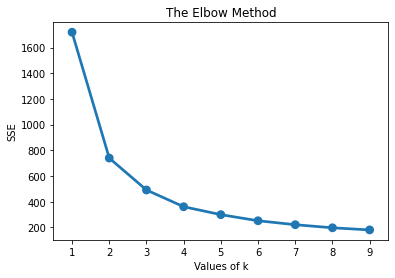

In [150]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(rfm_scaled)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [151]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 클러스터 지정
cluster_labels = kmeans.labels_
rfm_k3 = rfm.assign(Cluster = cluster_labels)
rfm_k3.head()

Publisher    Annual  Total  Count  Cluster
0               10TACLE Studios  0.005455   0.06      3        1
1                    1C Company  0.007143   0.05      3        1
2  20th Century Fox Video Games  0.021351   0.79      5        2
3                        2D Boy  0.004000   0.04      1        1
4                           3DO  0.067368   1.28     36        0

In [152]:
rfm_k3.groupby(['Cluster']).agg({
    'Annual': 'mean',
    'Total': ['mean','count'],
    'Count': 'mean'
}).round(0)

Annual Total        Count
          mean  mean count   mean
Cluster                          
0          0.0   3.0    74  182.0
1          0.0   0.0   263    2.0
2          0.0   1.0   236    9.0

In [153]:
cluster_0 = rfm_k3[rfm_k3.Cluster == 0]
cluster_1 = rfm_k3[rfm_k3.Cluster == 1]
cluster_2 = rfm_k3[rfm_k3.Cluster == 2]

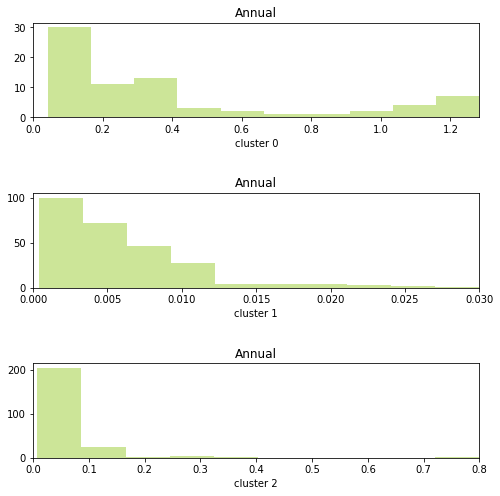

In [154]:
var = [cluster_0.Annual, cluster_1.Annual, cluster_2.Annual]
cluster = ['cluster 0', 'cluster 1', 'cluster 2']

fig, ax = plt.subplots(3,1, figsize=[8,8])

for i in range(len(var)):
  variable= var[i]
  ax[i].hist(variable, alpha=0.5, color='yellowgreen')
  ax[i].set_xlim(0, var[i].max())
  ax[i].set_xlabel(f'{cluster[i]}')
  ax[i].set_title('Annual')

plt.subplots_adjust(hspace=0.8)

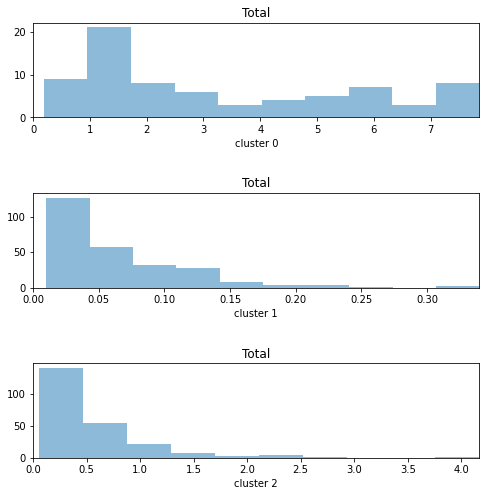

In [155]:
var = [cluster_0.Total, cluster_1.Total, cluster_2.Total]

fig, ax = plt.subplots(3,1, figsize=[8,8])

for i in range(len(var)):
  variable= var[i]
  ax[i].hist(variable, alpha=0.5)
  ax[i].set_xlim(0, var[i].max())
  ax[i].set_xlabel(f'{cluster[i]}')
  ax[i].set_title('Total')

plt.subplots_adjust(hspace=0.8)

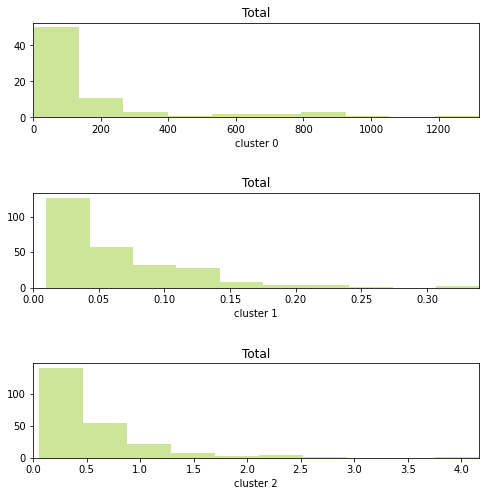

In [156]:
var = [cluster_0.Count, cluster_1.Total, cluster_2.Total]

fig, ax = plt.subplots(3,1, figsize=[8,8])

for i in range(len(var)):
  variable= var[i]
  ax[i].hist(variable, alpha=0.5, color='yellowgreen')
  ax[i].set_xlim(0, var[i].max())
  ax[i].set_xlabel(f'{cluster[i]}')
  ax[i].set_title('Total')

plt.subplots_adjust(hspace=0.8)

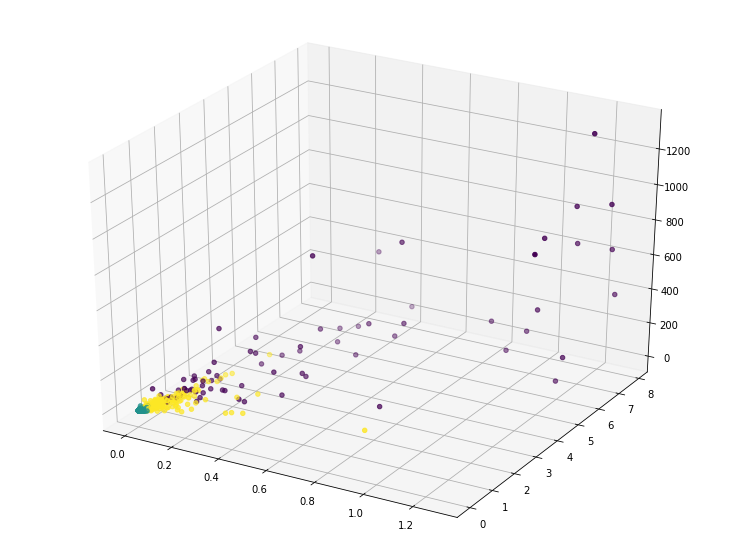

In [241]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = rfm_k3.Annual, ys = rfm_k3.Total, zs = rfm_k3.Count, c=rfm_k3.Cluster)
plt.show();

In [158]:
cluster_avg = rfm_k3.groupby(['Cluster']).mean()
cluster_avg

Annual     Total       Count
Cluster                                
0        0.394847  3.333108  181.905405
1        0.005870  0.063954    2.064639
2        0.050758  0.570169    8.631356

In [159]:
# Cluster0이 마케팅 목표

In [160]:
population_avg = rfm.mean()
population_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Annual     0.074592
Total      0.694642
Count     27.994764
dtype: float64

In [161]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

Annual  Total  Count
Cluster                      
0          4.29   3.80   5.50
1         -0.92  -0.91  -0.93
2         -0.32  -0.18  -0.69

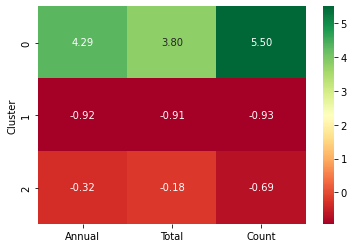

In [162]:
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap = "RdYlGn");

In [163]:
target_df = rfm_k3.loc[rfm_k3.Cluster == 0]
target_df.head()

Publisher    Annual  Total  Count  Cluster
4                     3DO  0.067368   1.28     36        0
6               505 Games  0.851250   6.81    189        0
10            989 Studios  0.115500   2.31     14        0
13    ASCII Entertainment  0.100000   2.10     19        0
17  Acclaim Entertainment  0.168000   3.36    184        0

In [242]:
target_df.sort_values(by=['Total'], axis=0, ascending=False).reset_index(drop=True)

Publisher    Annual  Total  Count  Cluster
0                               SquareSoft  0.413684   7.86     51        0
1                                 Nintendo  1.255000   7.84    643        0
2                                    Atari  0.272727   7.81    345        0
3                     Take-Two Interactive  1.283333   7.72    400        0
4              Sony Computer Entertainment  1.135000   7.57    665        0
5                               Activision  1.282500   7.38    945        0
6                          Electronic Arts  1.205000   7.34   1321        0
7                                  Ubisoft  1.151667   7.27    906        0
8                                505 Games  0.851250   6.81    189        0
9                   Microsoft Game Studios  1.003333   6.77    180        0
10                      Bethesda Softworks  0.937143   6.56     64        0
11                                  Capcom  1.086667   6.29    373        0
12                          GT Interactive  0.329474   6.26     45        0
13            Konami Digital Entertainment  1.126667   6.05    817        0
14                                    Sega  0.540000   6.02    627        0
15      Sony Computer Entertainment Europe  1.196000   5.98     15        0
16                               LucasArts  0.529091   5.82     87        0
17                      Virgin Interactive  0.291000   5.82     60        0
18  Warner Bros. Interactive Entertainment  1.260000   5.52    216        0
19                   Universal Interactive  0.318824   5.42     22        0
20                             Square Enix  0.610000   5.37    227        0
21                       Eidos Interactive  0.472222   5.24    194        0
22                               RedOctane  0.426667   5.12      4        0
23                           Vivendi Games  0.314000   4.71    160        0
24                        Enix Corporation  0.247778   4.46     30        0
25                      Namco Bandai Games  1.243333   4.23    910        0
26                      Hasbro Interactive  0.198571   4.17     15        0
27                                     THQ  0.395714   3.58    708        0
28                         Fox Interactive  0.169524   3.56      8        0
29                   Acclaim Entertainment  0.168000   3.36    184        0
30                               MTV Games  0.398750   3.19     40        0
31              Disney Interactive Studios  0.380000   3.16    213        0
32                   Majesco Entertainment  0.412857   2.89     90        0
33                             Codemasters  0.216667   2.86    150        0
34                                 Level 5  0.760000   2.68     26        0
35                            Midway Games  0.229091   2.52    195        0
36                             Deep Silver  0.341429   2.39    120        0
37                             989 Studios  0.115500   2.31     14        0
38                                  NCSoft  0.383333   2.30      6        0
39                     ASCII Entertainment  0.100000   2.10     19        0
40                              Tecmo Koei  0.140000   2.10    338        0
41                               Mindscape  0.232222   2.09     32        0
42                              Infogrames  0.128750   2.06     61        0
43                                 Unknown  0.115714   1.85     99        0
44                             D3Publisher  0.155455   1.71    180        0
45                        Activision Value  0.188889   1.70     28        0
46                               Banpresto  0.068000   1.70     72        0
47                      Oxygen Interactive  0.140000   1.68     21        0
48                             Global Star  0.113571   1.59     39        0
49                                  GungHo  0.302000   1.51     13        0
50                     Crave Entertainment  0.083333   1.50     70        0
51                             Hudson Soft  0.092222   1.50     79        0
52   

In [165]:
# target 기업의 평균 매출량을 목표로 한다

In [166]:
target_list = []
target_list = list(target_df.Publisher)

In [167]:
target_sales = []

for i in range(len(df)):
    if df.Publisher[i] in target_list: target_sales.append(df.Total_Sales[i])
    else: continue

In [168]:
target_sales = np.array(target_sales)
target_sales.mean().round(2)

0.62

In [169]:
# target total sales = 620k (620,000)

In [170]:
target2_sales = []

for i in range(len(df)):
    if df.Publisher[i] in target_list: target2_sales.append(df.Annual_Sales_Estimate[i])
    else: continue

target2_sales = np.array(target2_sales)
target2_sales.mean().round(2)

0.07

In [171]:
# target annual sales = 70k (70,000)